In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
import missingno as msno
import warnings
import os
from functools import lru_cache
from math import ceil
from itertools import zip_longest
from typing import List, Tuple, Union, Any
from scipy.stats import chi2_contingency
from itertools import combinations
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import r_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet 
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier  # Make sure CatBoost is imported
from lightgbm import LGBMClassifier
import statsmodels.api as sm
import lightgbm as lgb

In [2]:
# Set style for plots
sns.set_style("whitegrid")
warnings.filterwarnings('ignore') 

# Define custom params for plots
rcParams = {
    'font.size': 10,                # all font sizes in plot
    'font.weight': 'bold',          # bold all fonts
    'figure.titleweight': 'bold',   # bold supertitle
    'axes.labelweight': 'bold',     # bold x and y labels
    'axes.linewidth': 3,            # linewidth for axes
    'xtick.major.width': 3,         # width for major ticks on x-axis
    'ytick.major.width': 3,         # width for major ticks on y-axis
    'axes.spines.top': True,
    'axes.spines.right': True,
    'lines.linewidth': 3,
    'legend.fontsize': 'large',
    'xtick.labelsize': 8,          # sets x-tick font size
    'ytick.labelsize': 6,          # sets y-tick font size
    'axes.titlepad': 10,            # spacing between title and figure
    'axes.facecolor': 'white',      # background color for axes
    'axes.titlesize': 10,           # title font size for axes
    'axes.titleweight': 'bold'      
}

# Update rcparams
mpl.rcParams.update(rcParams) 

In [3]:
data= pd.read_csv("Ames_HousePrice.csv")

In [4]:
data.shape

(2580, 82)

In [5]:
data

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [6]:
data.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [7]:
print(data.dtypes)
print(data.dtypes.value_counts())
"""This output reveals that the dataset comprises object (43 variables), int64 (28 variables),
and float64 (11 variables) data types. Here, object typically indicates nominal variables,which are categorical data without an inherent order. 
Meanwhile, int64 and float64 suggest numerical data, which could be either discrete (int64 for countable numbers) or 
continuous (float64 for measurable quantities on a continuous scale)"""

Unnamed: 0        int64
PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 82, dtype: object
object     43
int64      28
float64    11
Name: count, dtype: int64


'This output reveals that the dataset comprises object (43 variables), int64 (28 variables),\nand float64 (11 variables) data types. Here, object typically indicates nominal variables,which are categorical data without an inherent order. \nMeanwhile, int64 and float64 suggest numerical data, which could be either discrete (int64 for countable numbers) or \ncontinuous (float64 for measurable quantities on a continuous scale)'

In [8]:
# Separating numerical features and categorical features
numerical_features = data.select_dtypes(include = "number").columns
categorical_features = data.select_dtypes(include=['object']).columns

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Categorical Features: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExpos

In [9]:
#Identify categorical data types and rank them in the order in which they are most affected by missing data

missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
data_type = data.dtypes
 
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage,
                             'Data Type':data_type})
 
# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
 
# Display columns with missing values of 'object' data type
print(missing_info[(missing_info['Missing Values'] > 0) & (missing_info['Data Type'] == 'object')])

#The  missing values for the entire list of categorical features below indicate the absence of that feature 
#for a given property, except for “Electrical”. With this insight, we can impute with the “mode” for the 1 missing data point 
#for the electrical system and impute all others using "None"""" 

              Missing Values  Percentage Data Type
PoolQC                  2571   99.651163    object
MiscFeature             2483   96.240310    object
Alley                   2412   93.488372    object
Fence                   2055   79.651163    object
MasVnrType              1573   60.968992    object
FireplaceQu             1241   48.100775    object
GarageQual               129    5.000000    object
GarageFinish             129    5.000000    object
GarageCond               129    5.000000    object
GarageType               127    4.922481    object
BsmtExposure              71    2.751938    object
BsmtFinType2              70    2.713178    object
BsmtCond                  69    2.674419    object
BsmtQual                  69    2.674419    object
BsmtFinType1              69    2.674419    object
Electrical                 1    0.038760    object


In [10]:
# Imputing Missing Categorical Data 
mode_value = data['Electrical'].mode()[0]
data['Electrical'].fillna(mode_value, inplace=True)
 
missing_categorical = missing_info[(missing_info['Missing Values'] > 0)
                           & (missing_info['Data Type'] == 'object')]
 
for item in missing_categorical.index.tolist():
    data[item].fillna("None", inplace=True)
 
print(data[missing_categorical.index].isnull().sum())

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
MasVnrType      0
FireplaceQu     0
GarageQual      0
GarageFinish    0
GarageCond      0
GarageType      0
BsmtExposure    0
BsmtFinType2    0
BsmtCond        0
BsmtQual        0
BsmtFinType1    0
Electrical      0
dtype: int64


In [11]:
# Identify numerical data types and rank them in the order in which they are most affected by missing data. 
# Calculating the percentage of missing values for each column
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
data_type = data.dtypes
 
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage,
                             'Data Type':data_type})
 
# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
 
# Display columns with missing values of numeric data type
print(missing_info[(missing_info['Missing Values'] > 0)
                   & (missing_info['Data Type'] == np.number)])

'''This code  illustrates that there are fewer instances of missing numerical data versus missing categorical data.
However, the data dictionary is not as useful for a straightforward imputation. Whether or not to impute missing data in
data science largely depends on the goal of the analysis. Often, a data scientist may generate multiple imputations to account 
for the uncertainty in the imputation process. Common multiple imputation methods include (but are not limited to) mean, median, 
and regression imputation''' 


              Missing Values  Percentage Data Type
LotFrontage              462   17.906977   float64
GarageYrBlt              129    5.000000   float64
MasVnrArea                14    0.542636   float64
BsmtFullBath               2    0.077519   float64
BsmtHalfBath               2    0.077519   float64
GarageCars                 1    0.038760   float64
GarageArea                 1    0.038760   float64
TotalBsmtSF                1    0.038760   float64
BsmtFinSF1                 1    0.038760   float64
BsmtFinSF2                 1    0.038760   float64
BsmtUnfSF                  1    0.038760   float64


'This code  illustrates that there are fewer instances of missing numerical data versus missing categorical data.\nHowever, the data dictionary is not as useful for a straightforward imputation. Whether or not to impute missing data in\ndata science largely depends on the goal of the analysis. Often, a data scientist may generate multiple imputations to account \nfor the uncertainty in the imputation process. Common multiple imputation methods include (but are not limited to) mean, median, \nand regression imputation'

In [12]:
#Imputing  Missing numerical Values
# Initialize a DataFrame to store the concise information
concise_info = pd.DataFrame(columns=['Feature', 'Missing Values After Imputation', 
                                     'Mean Value Used to Impute'])
 
# Identify and impute missing numerical values, and store the related concise information
missing_numeric_feature = missing_info[(missing_info['Missing Values'] > 0)
                           & (missing_info['Data Type'] == np.number)]
 
for item in missing_numeric_feature.index.tolist():
    mean_value = data[item].mean(skipna=True)
    data[item].fillna(mean_value, inplace=True)
 
    # Append the concise information to the concise_info DataFrame
    concise_info.loc[len(concise_info)] = pd.Series({
        'Feature': item,
        'Missing Values After Imputation': data[item].isnull().sum(),
        'Mean Value Used to Impute': mean_value
    })
 
# Display the concise_info DataFrame
print(concise_info)

         Feature Missing Values After Imputation Mean Value Used to Impute
0    LotFrontage                               0                 68.516053
1    GarageYrBlt                               0               1976.982048
2     MasVnrArea                               0                 99.308262
3   BsmtFullBath                               0                  0.435221
4   BsmtHalfBath                               0                  0.062064
5     GarageCars                               0                  1.747577
6     GarageArea                               0                466.842575
7    TotalBsmtSF                               0                 1036.6867
8     BsmtFinSF1                               0                444.346258
9     BsmtFinSF2                               0                 53.238852
10     BsmtUnfSF                               0                 539.10159


In [13]:
missing_values_count = data.isnull().sum().sum()
print(f'The DataFrame has a total of {missing_values_count} missing values.')

The DataFrame has a total of 0 missing values.


In [14]:
data.isnull().sum()


Unnamed: 0       0
PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 82, dtype: int64

In [15]:
#correlation between sale price and other features
correlation_with_saleprice=data.select_dtypes(include=['float64', 'int64']).corr()["SalePrice"]
sorted_correlations = correlation_with_saleprice.sort_values(ascending=False)
sorted_correlations

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652002
1stFlrSF         0.642613
GarageCars       0.638785
GarageArea       0.634976
YearBuilt        0.544370
FullBath         0.534982
YearRemodAdd     0.514309
GarageYrBlt      0.505617
MasVnrArea       0.500142
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.460636
LotFrontage      0.338396
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290867
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.167463
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022512
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
Unnamed: 0      -0.028413
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033777
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID         

In [16]:
data

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,68.516053,7890,Pave,None,...,166,0,None,None,None,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,None,...,0,0,None,None,None,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,None,...,0,0,None,None,None,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.000000,8146,Pave,None,...,111,0,None,None,None,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.000000,8400,Pave,None,...,0,0,None,None,None,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,759,903205040,952,121000,30,RL,68.516053,8854,Pave,None,...,40,0,None,None,None,0,5,2009,WD,Normal
2576,760,905402060,1733,139600,20,RL,68.516053,13680,Pave,None,...,0,0,None,None,None,0,6,2009,WD,Normal
2577,761,909275030,2002,145000,90,RH,82.000000,6270,Pave,None,...,0,0,None,None,None,0,8,2007,WD,Normal
2578,762,907192040,1842,217500,60,RL,68.516053,8826,Pave,None,...,0,0,None,None,None,0,7,2007,WD,Normal


In [17]:
data[numerical_features].describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2580.000000,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,436.480233,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,258.829647,1.886626e+08,488.650181,75031.089374,42.802105,20.689575,8126.937892,1.367590,1.122008,29.719705,...,207.436614,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,1.000000,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,215.750000,5.313630e+08,1112.000000,129975.000000,20.000000,60.000000,7406.750000,5.000000,5.000000,1953.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,430.500000,5.354546e+08,1436.000000,159900.000000,50.000000,68.516053,9391.000000,6.000000,5.000000,1972.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,645.250000,9.071811e+08,1733.000000,209625.000000,70.000000,78.000000,11494.000000,7.000000,6.000000,1999.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1000.000000,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [18]:
data[numerical_features].corr()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Unnamed: 0,1.000000,-0.008030,-0.013745,-0.028413,0.003400,0.011228,-0.019958,-0.017036,-0.005499,0.004610,...,-0.003580,-0.018456,-0.014715,-0.033399,-0.002035,0.003149,0.002005,-0.030896,0.011779,-0.008082
PID,-0.008030,1.000000,-0.102270,-0.226276,-0.005328,-0.086381,0.042049,-0.247168,0.120013,-0.337963,...,-0.198946,-0.041876,-0.054843,0.168778,-0.021198,-0.031646,-0.006526,-0.022524,-0.059940,0.002238
GrLivArea,-0.013745,-0.102270,1.000000,0.719981,0.070785,0.311469,0.260322,0.559897,-0.105670,0.228400,...,0.477107,0.247716,0.321777,0.000196,0.008714,0.097835,0.057935,-0.003940,0.038389,-0.008260
SalePrice,-0.028413,-0.226276,0.719981,1.000000,-0.084587,0.338396,0.274443,0.790501,-0.101091,0.544370,...,0.634976,0.333232,0.306540,-0.123235,0.031260,0.121463,0.030844,-0.018877,0.012591,-0.001376
MSSubClass,0.003400,-0.005328,0.070785,-0.084587,1.000000,-0.407005,-0.198040,0.056468,-0.075542,0.053852,...,-0.091176,-0.017656,-0.007649,-0.028535,-0.041798,-0.055099,-0.013431,-0.027226,0.007252,-0.025351
LotFrontage,0.011228,-0.086381,0.311469,0.338396,-0.407005,1.000000,0.341602,0.166868,-0.048723,0.094070,...,0.314406,0.107287,0.130789,0.003170,0.030235,0.076502,0.086013,0.012514,0.001972,-0.002329
LotArea,-0.019958,0.042049,0.260322,0.274443,-0.198040,0.341602,1.000000,0.080607,-0.032693,0.012397,...,0.199241,0.155687,0.084963,0.017694,0.017721,0.053820,0.052636,0.040220,0.010203,-0.017319
OverallQual,-0.017036,-0.247168,0.559897,0.790501,0.056468,0.166868,0.080607,1.000000,-0.095927,0.574400,...,0.538121,0.250181,0.286861,-0.134291,0.014226,0.049277,-0.002484,-0.025825,0.016780,0.005668
OverallCond,-0.005499,0.120013,-0.105670,-0.101091,-0.075542,-0.048723,-0.032693,-0.095927,1.000000,-0.397274,...,-0.168235,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632
YearBuilt,0.004610,-0.337963,0.228400,0.544370,0.053852,0.094070,0.012397,0.574400,-0.397274,1.000000,...,0.462947,0.227289,0.179654,-0.360933,0.009513,-0.042655,0.004925,-0.027354,-0.007534,0.015349


Text(0, 0.5, 'Frequency')

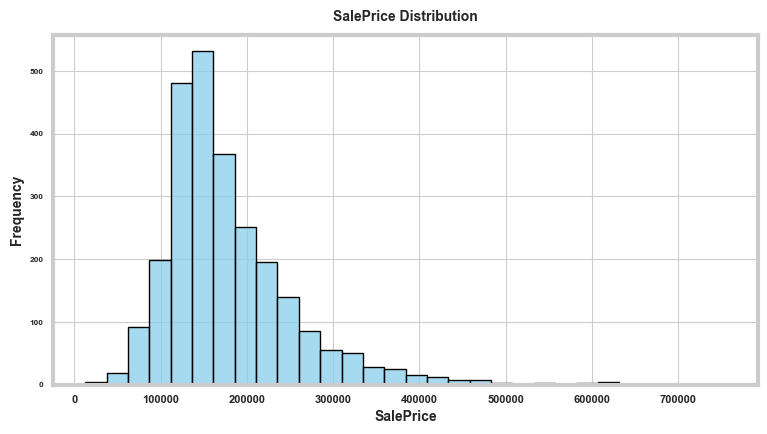

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.histplot(data['SalePrice'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

Skewness of SalePrice: 1.759777902149407


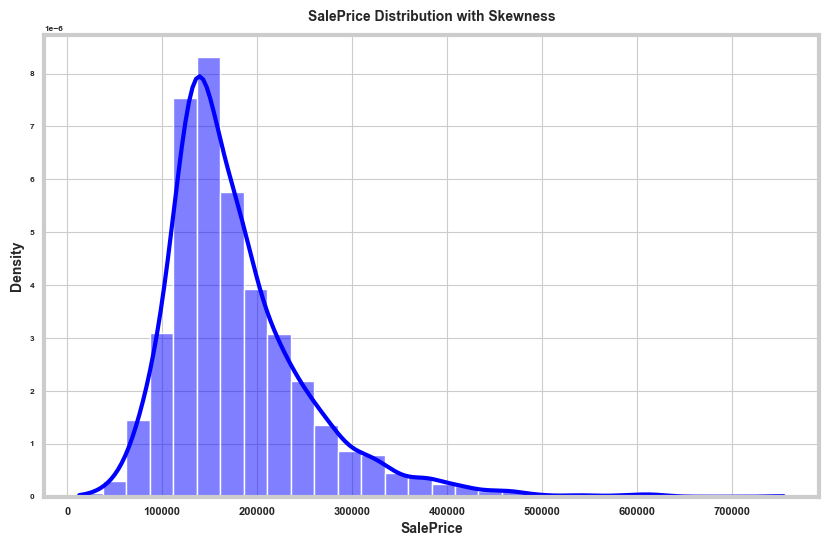

The distribution is positively skewed (right skew).


In [20]:
saleprice_skewness = skew(data['SalePrice'])
print(f"Skewness of SalePrice: {saleprice_skewness}")

# Create a histogram with a density plot
plt.figure(figsize=(10,6))
sns.histplot(data['SalePrice'], kde=True, bins=30, color='blue', stat='density')

# Adding labels and title
plt.title('SalePrice Distribution with Skewness')
plt.xlabel('SalePrice')
plt.ylabel('Density')

# Show the plot
plt.show()

# Optionally, print skewness value for interpretation
if saleprice_skewness > 0:
    print("The distribution is positively skewed (right skew).")
elif saleprice_skewness < 0:
    print("The distribution is negatively skewed (left skew).")
else:
    print("The distribution is symmetric.")

Text(0.5, 0, 'SalePrice')

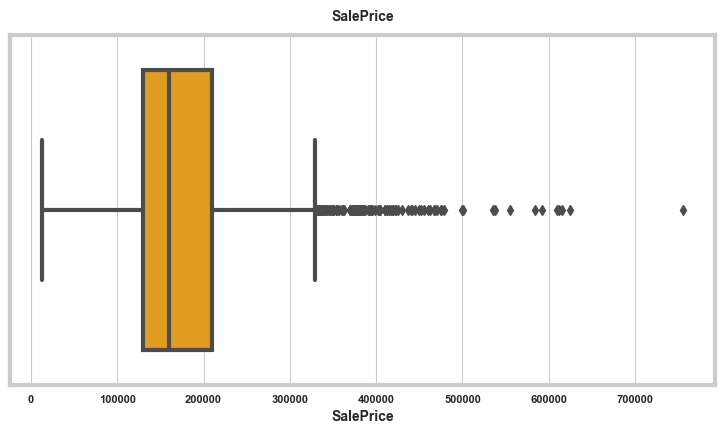

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.boxplot(x=data['SalePrice'], color='orange')
plt.title('SalePrice')
plt.xlabel('SalePrice')

In [22]:
target_name = "SalePrice"
X, y = (
    data.drop(columns = [target_name, 'PID']),
    data[target_name]
)

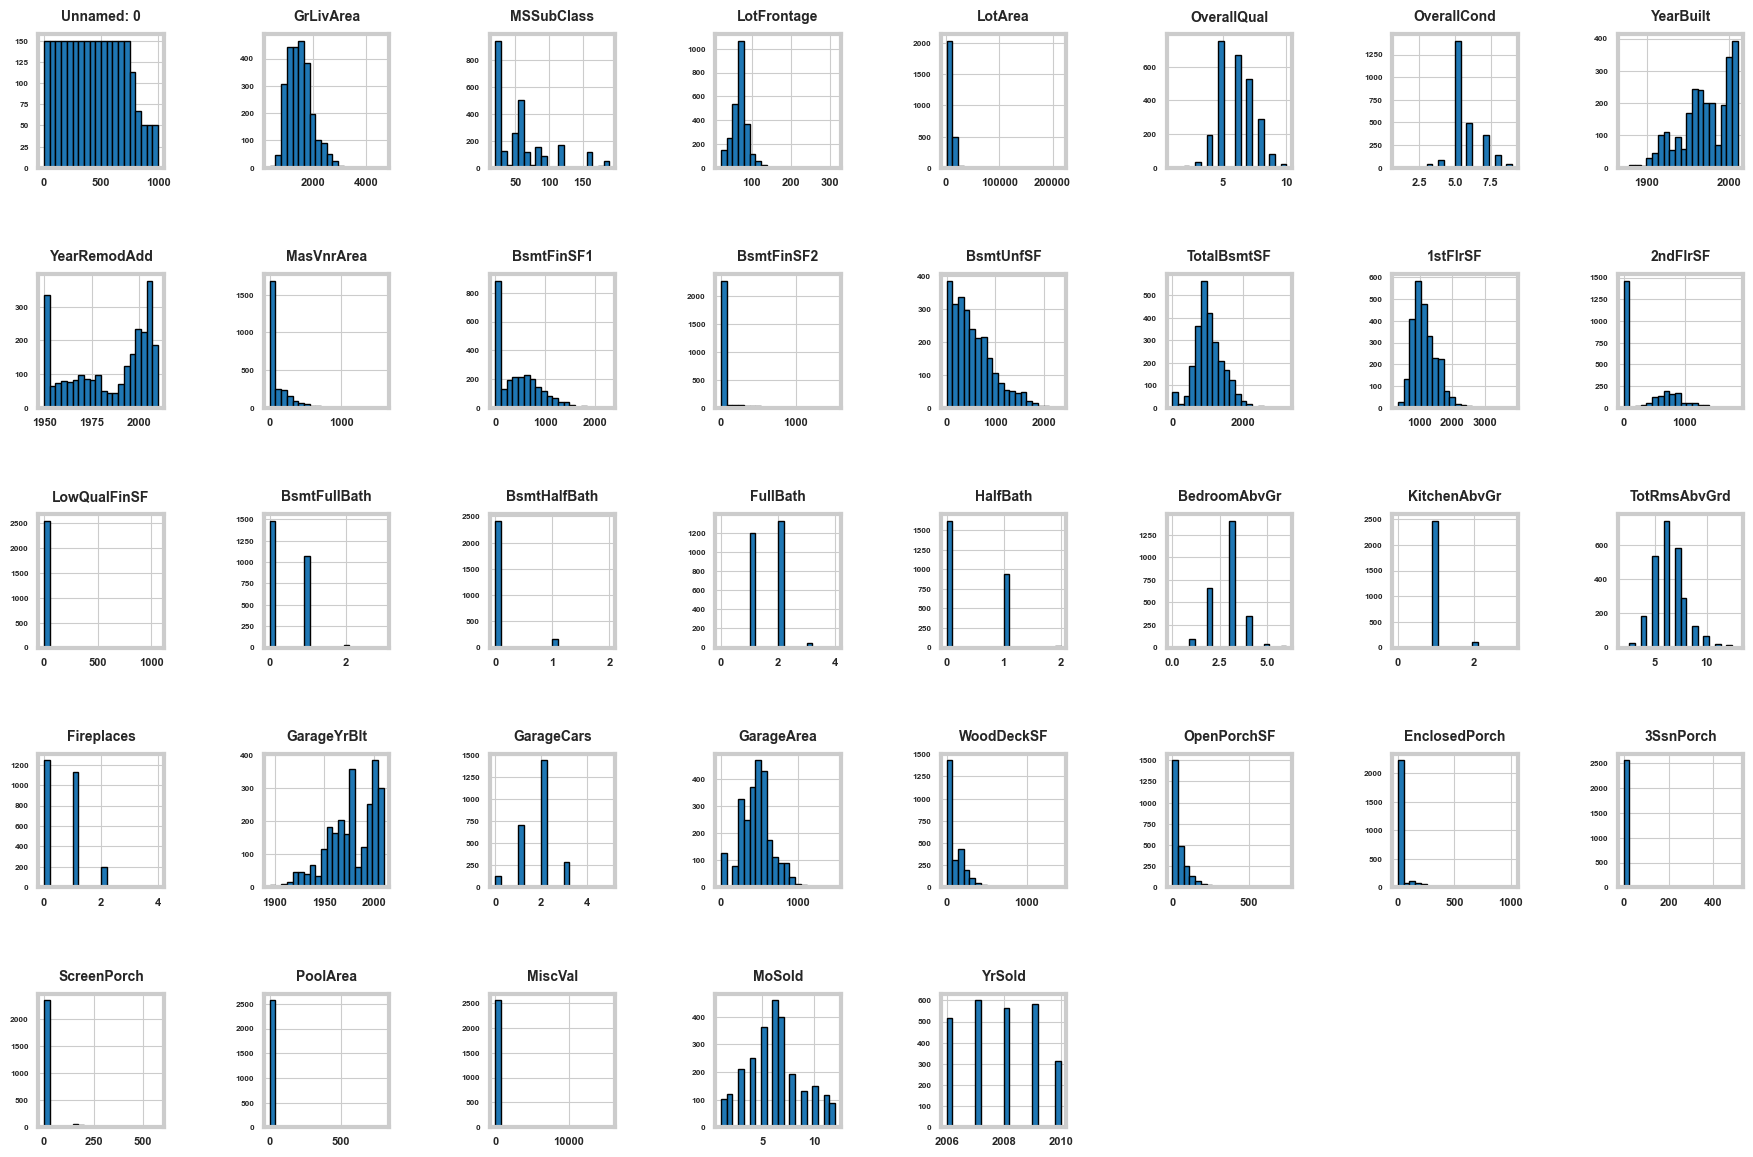

In [23]:
#Univariate and Multivariate Feature Relationships 
def plot_univariate_numerical_features(data: pd.DataFrame, nrow: int = 12, ncol: int = 8, figsize: tuple = (22, 36), bins: int = 20) -> None:
  
    numerical_data = data.select_dtypes(include=['number'])
    
    numerical_data.hist(
        bins=bins, figsize=figsize, edgecolor="black", layout=(nrow, ncol)
    )
    plt.subplots_adjust(hspace=0.8, wspace=0.8)

plot_univariate_numerical_features(X)

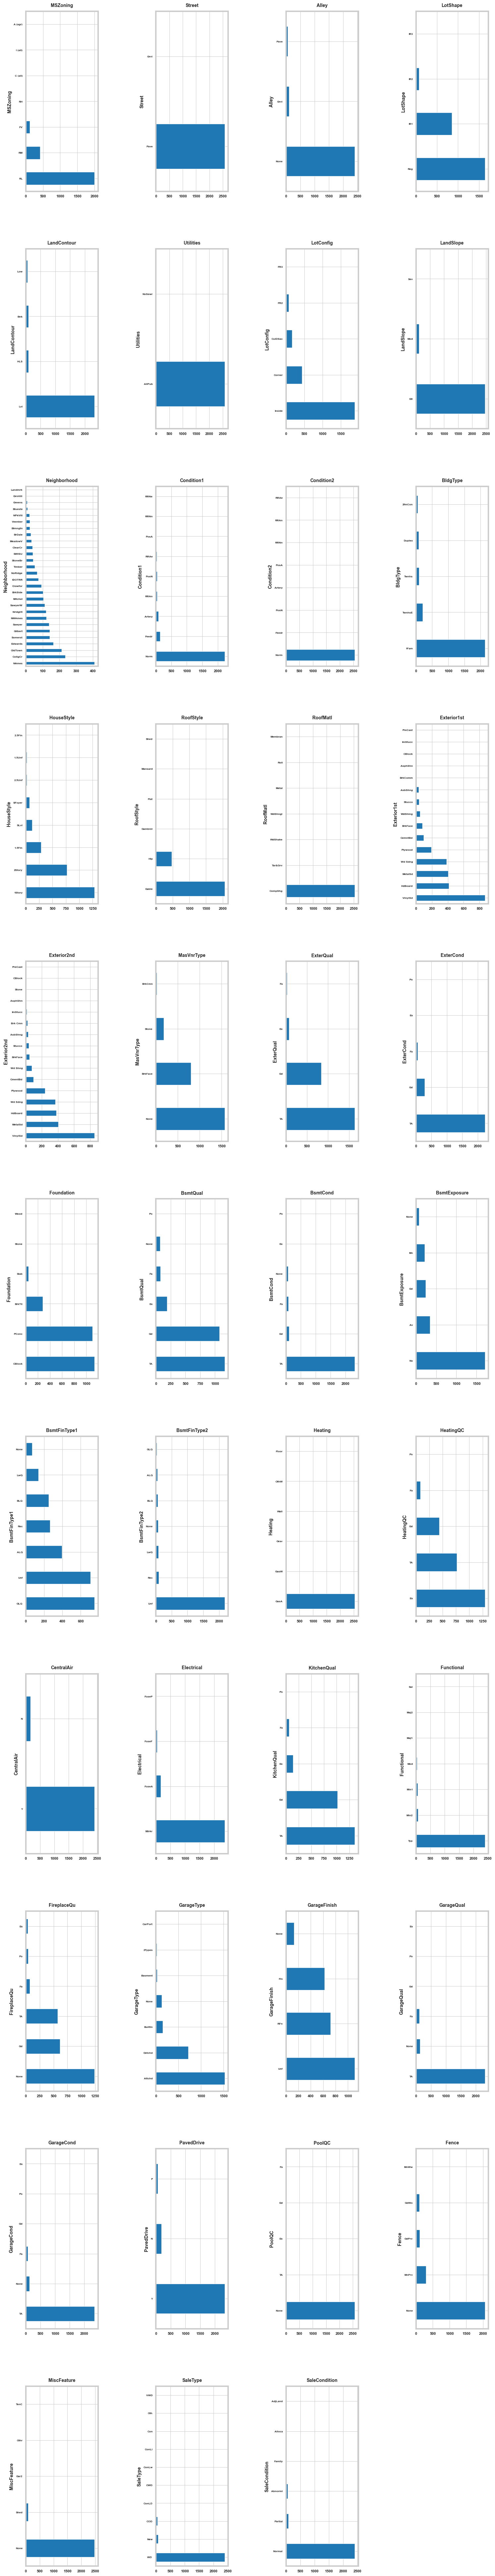

In [24]:
def plot_categorical_features(data: pd.DataFrame, ncol: int = 4, figsize: tuple = (18, 100)) -> None:

    categorical_features = data.select_dtypes(include=['object'])
    n_categorical_features = categorical_features.shape[1]
    nrows = ceil(n_categorical_features / ncol)
    
    fig, axs = plt.subplots(ncols=ncol, nrows=nrows, figsize=figsize)
    
    for feature_name, ax in zip_longest(categorical_features, axs.flatten()):
        if feature_name is None:
            # do not show the axis
            ax.axis("off")
            continue
        
        categorical_features[feature_name].value_counts().plot.barh(ax=ax)
        ax.set_title(feature_name)
    
    plt.subplots_adjust(hspace = 0.32, wspace = 0.8)

# Example usage:
plot_categorical_features(X)

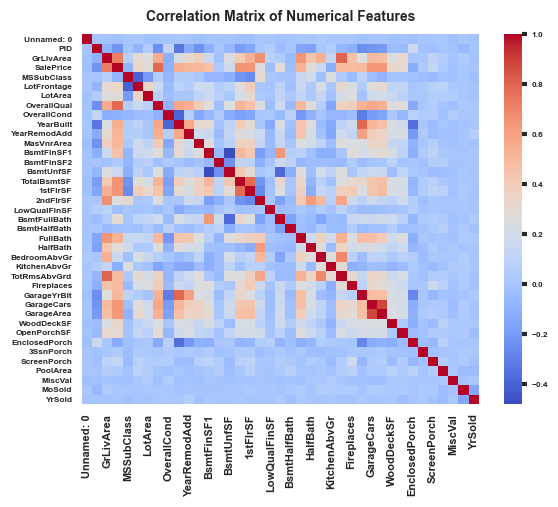

In [25]:
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Show the correlation with SalePrice
#print(correlation_matrix['SalePrice'].sort_values(ascending=False))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.8f', linewidths=0.001)
# Display the plot
plt.title('Correlation Matrix of Numerical Features')
plt.show()


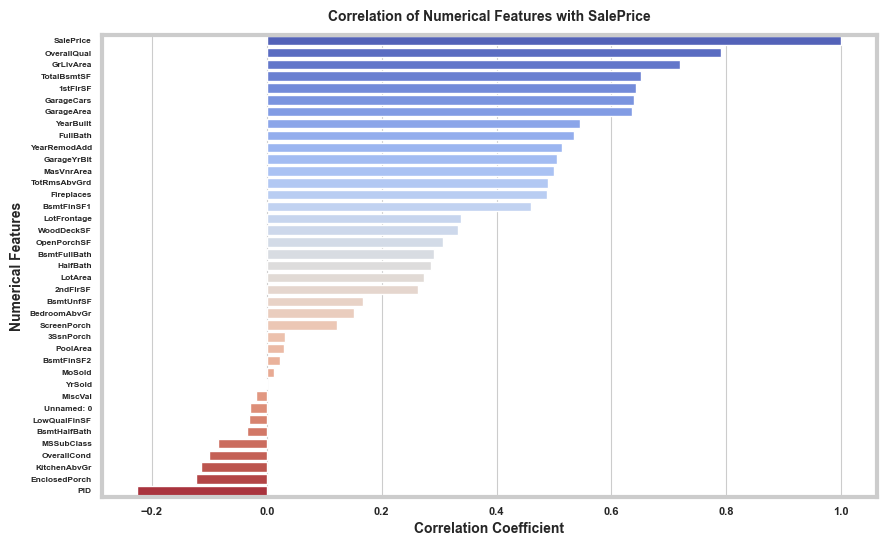

In [26]:

correlation_with_saleprice = correlation_matrix['SalePrice']

# Sort the correlation values in descending order
correlation_with_saleprice_sorted = correlation_with_saleprice.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_saleprice_sorted.values, y=correlation_with_saleprice_sorted.index, palette='coolwarm')

# Title and labels
plt.title('Correlation of Numerical Features with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numerical Features')

# Show the plot
plt.show()

In [27]:
#Numerical features highly correlated to Sale Price
#OverallQual
#GrLivArea

#Categorical  features with a strong relationship to Sale Price
#BsmtQual 
#KitchenQual
#ExterQual
#Neighborhood


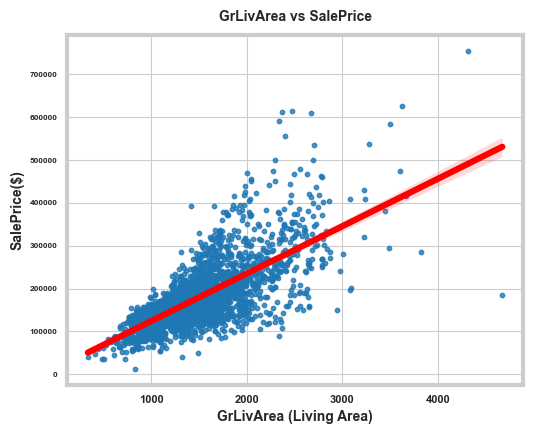

In [28]:
plt.figure(figsize=(20, 10))
plt.subplot(232)
sns.regplot(x='GrLivArea', y='SalePrice', data=data.select_dtypes(include=['number']) , scatter_kws={'s': 10}, line_kws={'color': 'red'});
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Living Area)')
plt.ylabel('SalePrice($)');

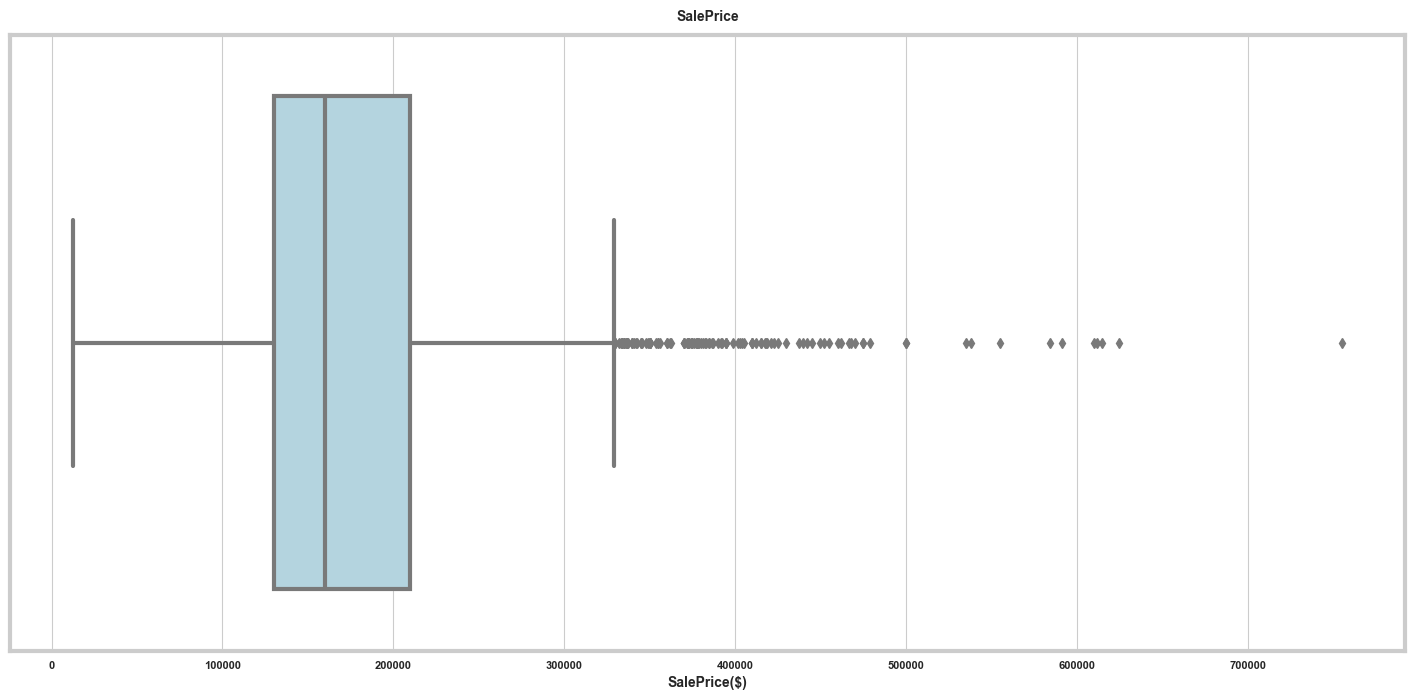

'The boxplot provides a summary of the distribution of SalePrice, helping you to quickly identify the central tendency,\nvariability, and any potential outliers in the data. If SalePrice has extreme values (outliers), this boxplot will make them visually apparent.  '

In [29]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=data['SalePrice'], color='lightblue')

plt.title('SalePrice')
plt.xlabel('SalePrice($)')

plt.show()
'''The boxplot provides a summary of the distribution of SalePrice, helping you to quickly identify the central tendency,
variability, and any potential outliers in the data. If SalePrice has extreme values (outliers), this boxplot will make them visually apparent.  '''

Text(0, 0.5, 'SalePrice($)')

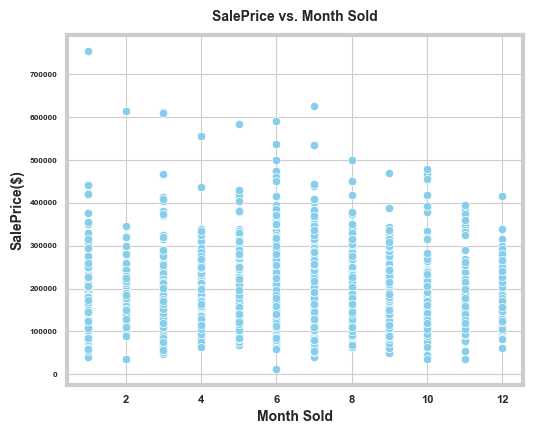

In [30]:
plt.figure(figsize=(20, 10))
plt.subplot(233)
sns.scatterplot(x='MoSold', y='SalePrice',data=data.select_dtypes(include=['number']) , color='skyblue')
plt.title('SalePrice vs. Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('SalePrice($)')

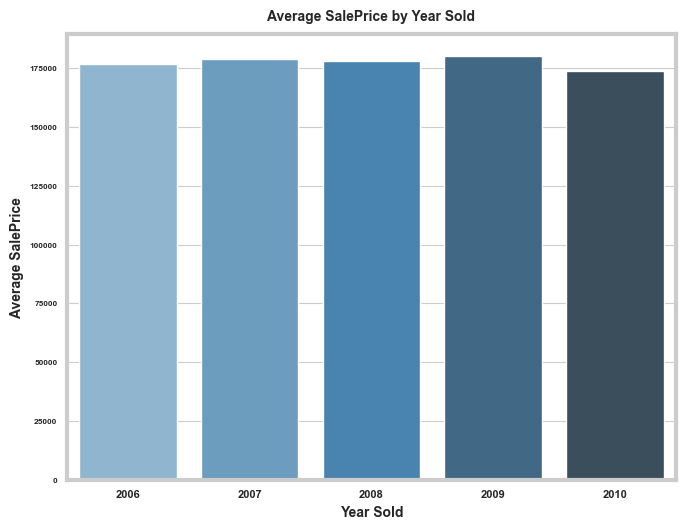

In [31]:
plt.figure(figsize=(20, 10))
plt.subplot(235)
yearly_avg_price =data.groupby('YrSold')['SalePrice'].mean()
sns.barplot(x=yearly_avg_price.index, y=yearly_avg_price.values, palette='Blues_d')
plt.title('Average SalePrice by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average SalePrice')

# Adjust the layout to make the plots readable
plt.tight_layout()

# Show the plots
plt.show()

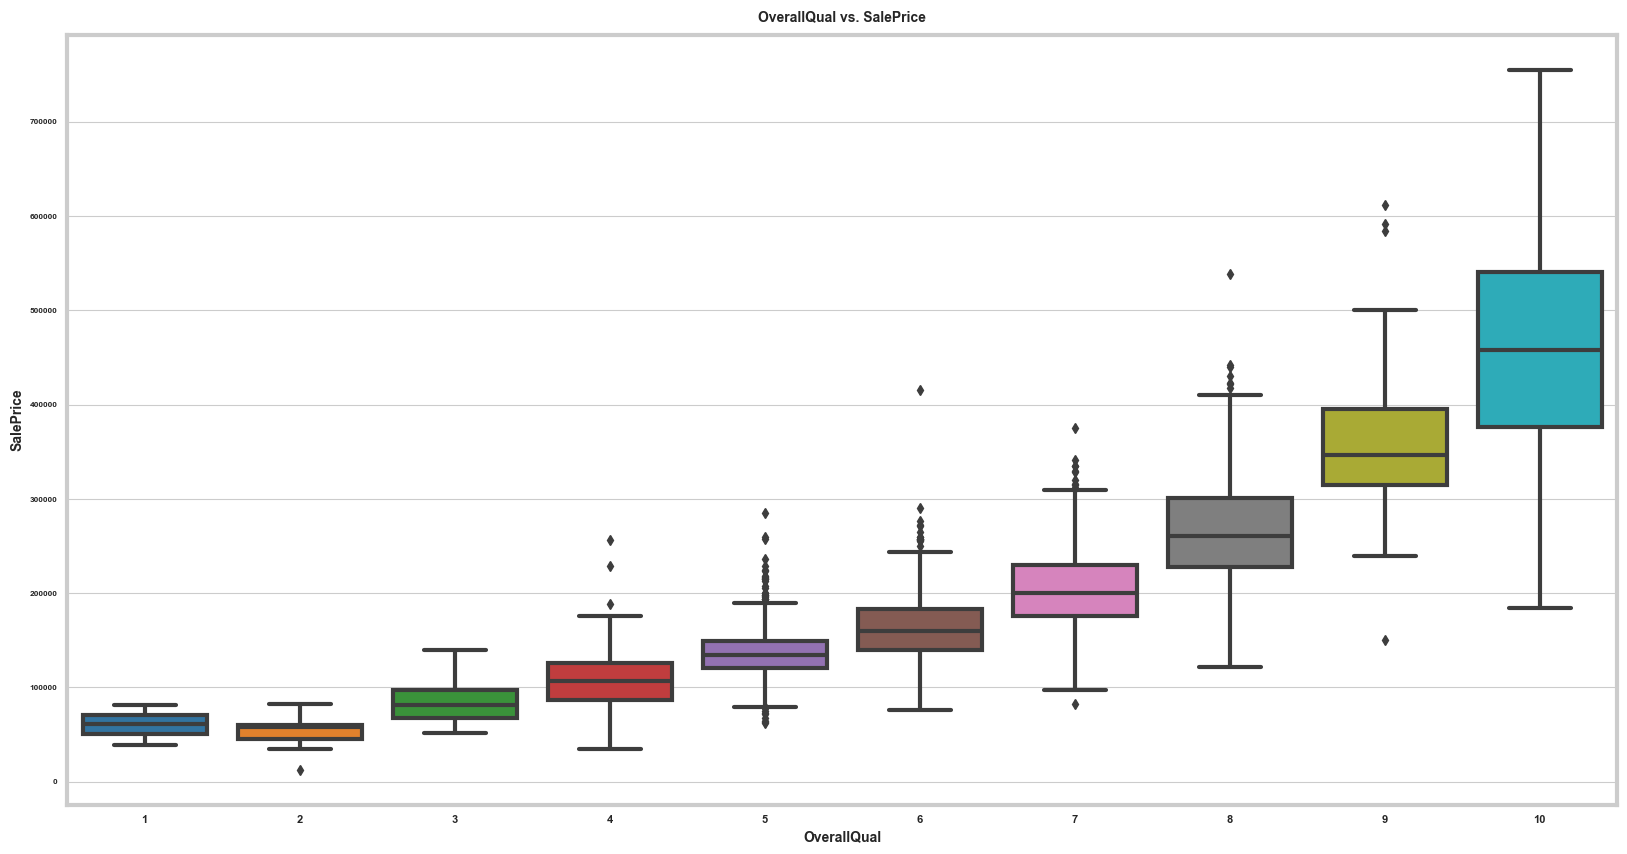

In [32]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="OverallQual", y="SalePrice", data=data)
plt.title('OverallQual vs. SalePrice')
plt.show()

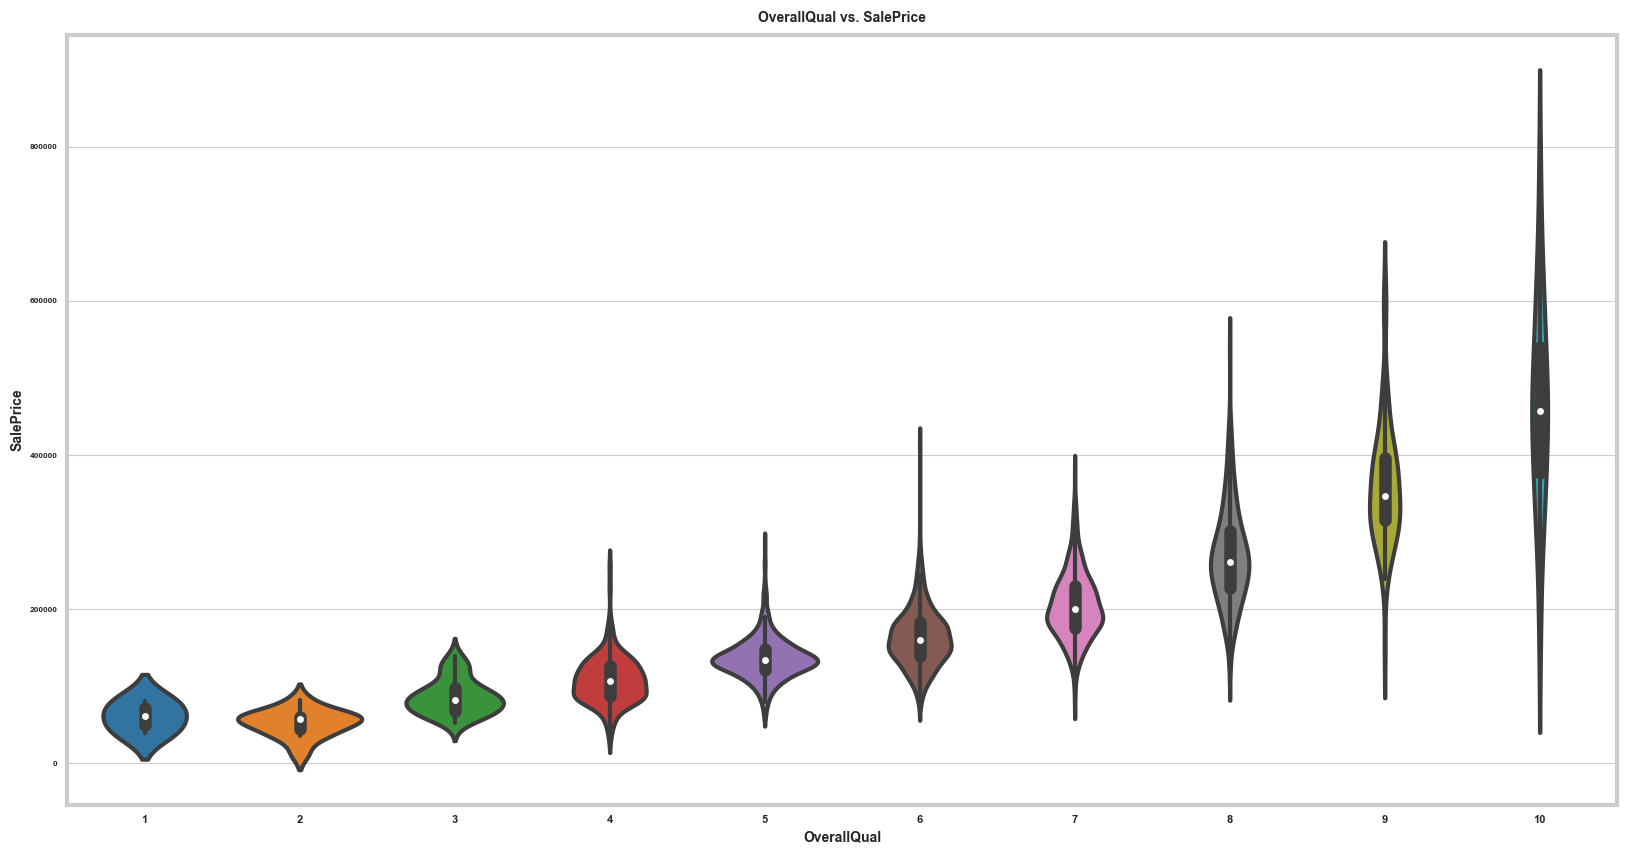

In [33]:
plt.figure(figsize=(20, 10))
sns.violinplot( x='OverallQual', y='SalePrice', data=data)
plt.title("OverallQual vs. SalePrice")
plt.show()

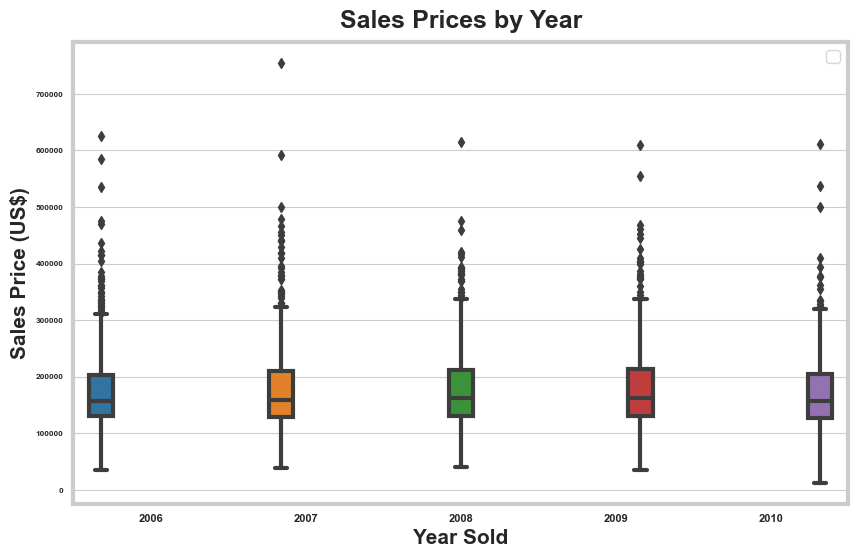

In [34]:
# Convert 'YrSold' to a categorical variable
data['YrSold'] = data['YrSold'].astype('category')
 
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['YrSold'], y=data['SalePrice'], hue=data['YrSold'])
plt.title('Sales Prices by Year', fontsize=18)
plt.xlabel('Year Sold', fontsize=15)
plt.ylabel('Sales Price (US$)', fontsize=15)
plt.legend('')
plt.show()

In [35]:
'''you can observe that the sales prices were quite consistent across different years because each year looks alike'''

'you can observe that the sales prices were quite consistent across different years because each year looks alike'

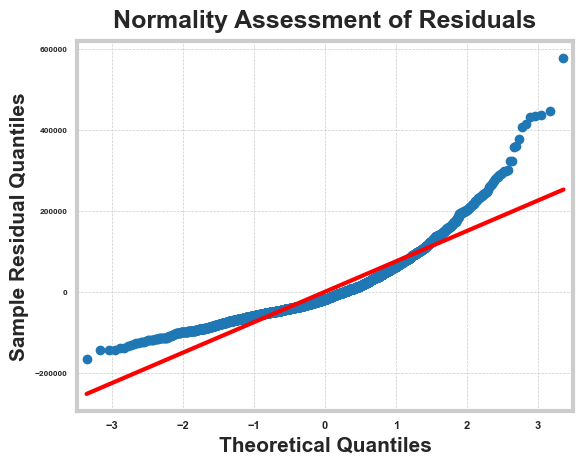

In [36]:
# Fit an ordinary least squares model and get residuals
model = sm.OLS(data['SalePrice'], data['YrSold'].astype('int')).fit()
residuals = model.resid
 
# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('Normality Assessment of Residuals', fontsize=18)
plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Residual Quantiles', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [37]:
# Create a DataFrame
df = pd.DataFrame(data)

# List of categorical features to test
categorical_features = data.select_dtypes(include=['object']).columns

# Loop through each categorical feature and perform ANOVA
for feature in categorical_features:
    # Group the data by the categorical feature
    grouped = df.groupby(feature)['SalePrice'].apply(list)
    
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*grouped)
    
    # Print the results
    print(f"ANOVA results for {feature}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print('-' * 40)

ANOVA results for MSZoning:
F-statistic: 56.2761586573439
P-value: 1.4429317817007338e-65
----------------------------------------
ANOVA results for Street:
F-statistic: 6.579408556187545
P-value: 0.010372634596129159
----------------------------------------
ANOVA results for Alley:
F-statistic: 26.528974847932083
P-value: 3.941091148645835e-12
----------------------------------------
ANOVA results for LotShape:
F-statistic: 89.25117916933644
P-value: 6.046467449164465e-55
----------------------------------------
ANOVA results for LandContour:
F-statistic: 28.706463831054446
P-value: 2.9691968359007565e-18
----------------------------------------
ANOVA results for Utilities:
F-statistic: 2.9950565498349833
P-value: 0.08363865813106647
----------------------------------------
ANOVA results for LotConfig:
F-statistic: 13.880718940091382
P-value: 3.3218304042022726e-11
----------------------------------------
ANOVA results for LandSlope:
F-statistic: 8.200261757177143
P-value: 0.000281809

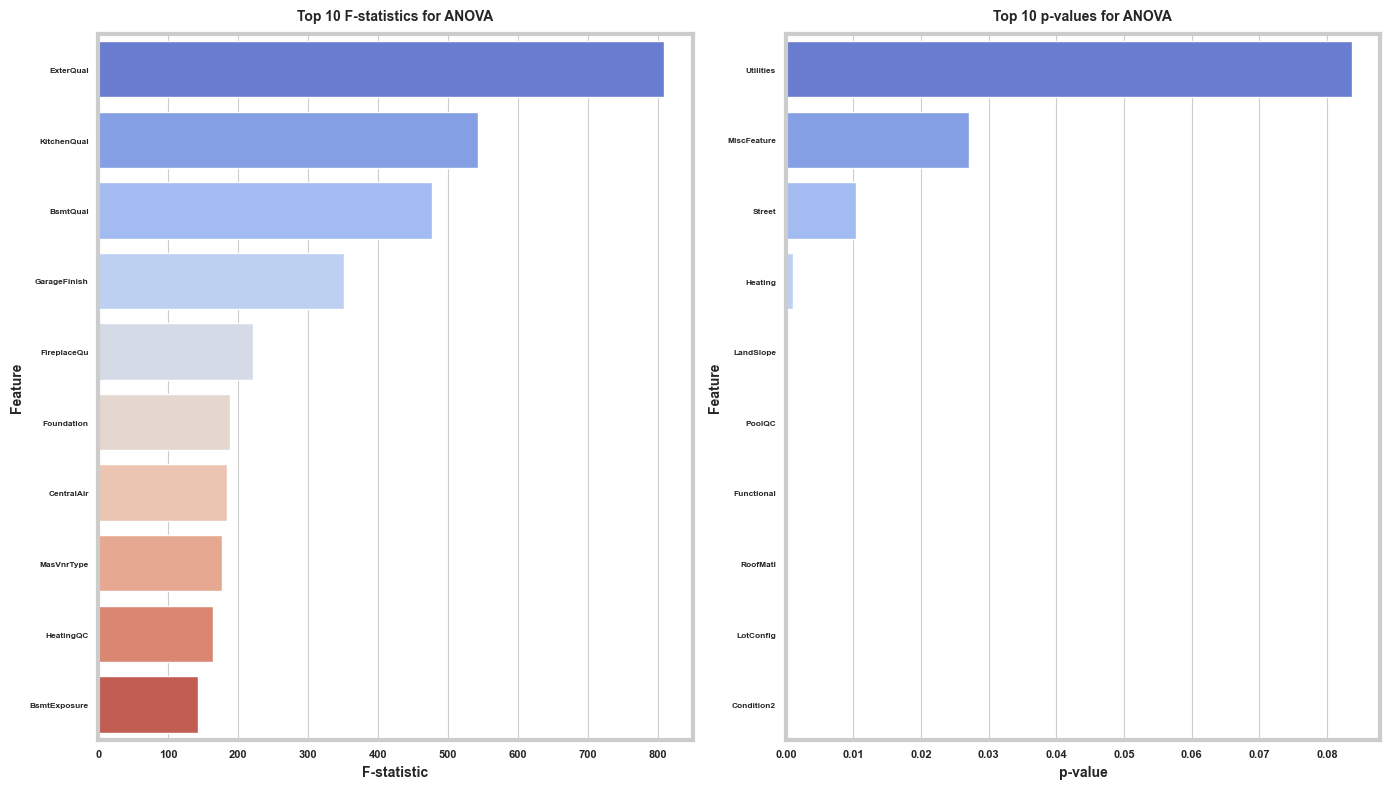

In [38]:
df = pd.DataFrame(data)

# List of categorical features to test
categorical_features = df.select_dtypes(include=['object']).columns

# Initialize lists to store F-statistics and p-values
f_statistics = []
p_values = []

# Loop through each categorical feature and perform ANOVA
for feature in categorical_features:
    # Group the data by the categorical feature and apply list aggregation to the numerical feature
    grouped = df.groupby(feature)['SalePrice'].apply(list)
    
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*grouped)
    
    # Append the results to the lists
    f_statistics.append(f_statistic)
    p_values.append(p_value)

# Create a DataFrame to hold F-statistics and p-values
anova_results = pd.DataFrame({
    'Feature': categorical_features,
    'F-statistic': f_statistics,
    'p-value': p_values
})

# Sort the results in descending order by F-statistic and pick the top 10
anova_results_sorted = anova_results.sort_values(by='F-statistic', ascending=False).head(10)


# Plot F-statistics and p-values in a barplot
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Plot F-statistics (sorted)
sns.barplot(x='F-statistic', y='Feature', data=anova_results_sorted, ax=ax[0], palette='coolwarm')
ax[0].set_title('Top 10 F-statistics for ANOVA')

# Plot p-values (sorted)
anova_results_sorted = anova_results.sort_values(by='p-value', ascending=False).head(10)
sns.barplot(x='p-value', y='Feature', data=anova_results_sorted, ax=ax[1], palette='coolwarm')
ax[1].set_title('Top 10 p-values for ANOVA')

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
#Choosing machine learning Model
SalePrice_dtype = data['SalePrice'].dtype
print(f"The data type of 'SalePrice' is {SalePrice_dtype}.")


The data type of 'SalePrice' is int64.


In [40]:
'''The “SalePrice” column is of data type int64, indicating that it represents integer values. 
Since “SalePrice” is a numerical variable rather than categorical, predicting the “SalePrice” would be a regression task.
This means the goal is to predict a continuous quantity (the sale price of a house) based on the input features provided in your dataset'''

'The “SalePrice” column is of data type int64, indicating that it represents integer values. \nSince “SalePrice” is a numerical variable rather than categorical, predicting the “SalePrice” would be a regression task.\nThis means the goal is to predict a continuous quantity (the sale price of a house) based on the input features provided in your dataset'

In [41]:
'''Supervised learning in machine learning focuses on predicting outcomes based on input data. 
In our case,with the Ames Housing dataset, we aim to predict a house’s sale price from its living using regression task.
To start, we select “GrLivArea” (ground living area) as our feature and “SalePrice” as the target. 
The next step involves splitting our dataset into training and testing sets using scikit-learn’s train_test_split() function. 
This crucial step allows us to train our model on one set of data and evaluate its performance on another, ensuring the model’s reliability'''
# Select features and target
X = data[['GrLivArea']]  # Feature: GrLivArea, 2D matrix
y = data['SalePrice']    # Target: SalePrice, 1D vector
 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
 
# Scoring the model
score = round(model.score(X_test, y_test), 4)
print(f"Model R^2 Score: {score}")


Model R^2 Score: 0.4855


In [42]:
#The model’s R² score of 0.4855 indicates that our model explains approximately 48% of the variation in sale prices based on the living area alone

In [43]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
cv_scores_rounded = [round(score, 4) for score in cv_scores]
print(f"Cross-Validation R^2 Scores: {cv_scores_rounded}")

Cross-Validation R^2 Scores: [0.4884, 0.5412, 0.5214, 0.5458, 0.4672]


In [44]:
#The roughly equal R² scores among the five means the model is stable.Linear regression provides an acceptable prediction power.

Fold 1:
TRAIN set size: 2064
TEST set size: 516
R² score: 0.4884

Fold 2:
TRAIN set size: 2064
TEST set size: 516
R² score: 0.5412

Fold 3:
TRAIN set size: 2064
TEST set size: 516
R² score: 0.5214

Fold 4:
TRAIN set size: 2064
TEST set size: 516
R² score: 0.5458

Fold 5:
TRAIN set size: 2064
TEST set size: 516
R² score: 0.4672



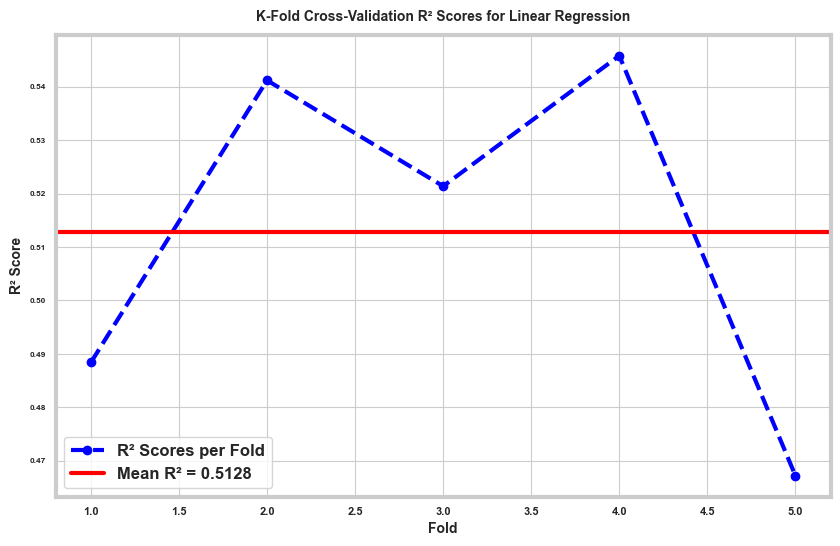

In [45]:
#K-Fold Cross-Validation
# Select features and target
X = data[['GrLivArea']].values  # Convert to numpy array for KFold
y = data['SalePrice'].values    # Convert to numpy array for KFold

# Initialize Linear Regression and K-Fold
model = LinearRegression()
kf = KFold(n_splits=5)

# List to store R² scores for each fold
r2_scores = []

# Manually perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate and print the R² score for the current fold
    fold_r2 = r2_score(y_test, y_pred)
    r2_scores.append(fold_r2)
    print(f"Fold {fold}:")
    print(f"TRAIN set size: {len(train_index)}")
    print(f"TEST set size: {len(test_index)}")
    print(f"R² score: {round(fold_r2, 4)}\n")

# Plotting Cross-Validation Results
plt.figure(figsize=(10, 6))

# Plot the R² scores for each fold
plt.plot(range(1, 6), r2_scores, marker='o', color='b', linestyle='--', label='R² Scores per Fold')

# Plot the mean R² score as a horizontal line
mean_r2 = np.mean(r2_scores)
plt.axhline(mean_r2, color='r', linestyle='-', label=f'Mean R² = {mean_r2:.4f}')

# Adding labels and title
plt.title('K-Fold Cross-Validation R² Scores for Linear Regression')
plt.xlabel('Fold')
plt.ylabel('R² Score')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [46]:
'''KFold opens it up, allowing us to view the exact splits of our data. This is incredibly valuable when you need to:
Understand how your data is being divided.
Implement custom preprocessing before each fold.
Gain insights into the consistency of your model’s performance'''

'KFold opens it up, allowing us to view the exact splits of our data. This is incredibly valuable when you need to:\nUnderstand how your data is being divided.\nImplement custom preprocessing before each fold.\nGain insights into the consistency of your model’s performance'

In [47]:
#The top 5 features that can be used individually in a simple linear regression:
X = data.select_dtypes(include=['number']).drop("SalePrice", axis=1)
y = data.select_dtypes(include=['number'])["SalePrice"]
 
# Initialize the Linear Regression model
model = LinearRegression()
 
# Prepare to collect feature scores
feature_scores = {}
 
# Evaluate each feature with cross-validation
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(model, X_single, y)
    feature_scores[feature] = cv_scores.mean()
 
# Identify the top 5 features based on mean CV R² scores
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
top_5 = sorted_features[0:5]
 
# Display the top 5 features and their individual performance
for feature, score in top_5:
    print(f"Feature: {feature}, Mean CV R²: {score:.4f}")

Feature: OverallQual, Mean CV R²: 0.6180
Feature: GrLivArea, Mean CV R²: 0.5128
Feature: TotalBsmtSF, Mean CV R²: 0.4058
Feature: GarageCars, Mean CV R²: 0.3966
Feature: 1stFlrSF, Mean CV R²: 0.3957


Mean CV R² Score for Multiple Linear Regression Model: 0.8001


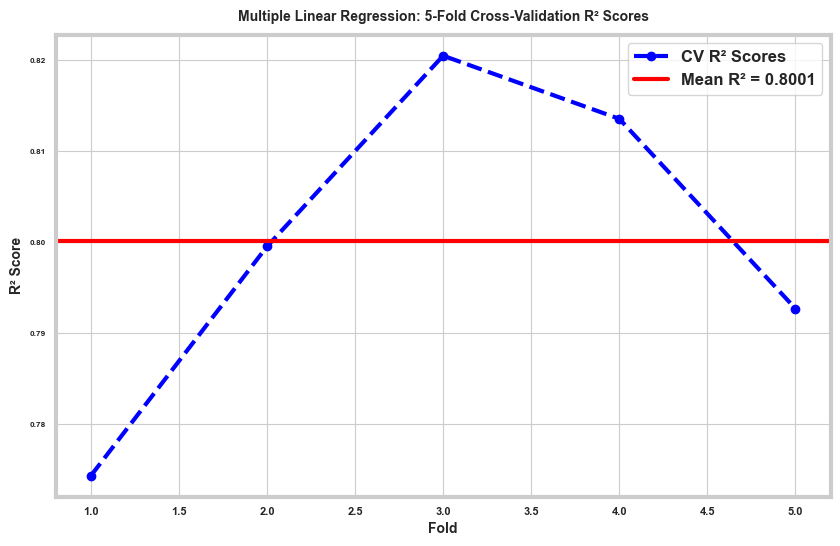

In [48]:
#Let's combine these top 5 features into a single multiple linear regression model to see if their collective power surpass their individual contributions
# Extracting the top 5 features for our multiple linear regression
top_features = [feature for feature, score in top_5]
 
# Building the model with the top 5 features
X_top = data.select_dtypes(include=['number'])[top_features]
 
# Evaluating the model with cross-validation
cv_scores_mlr = cross_val_score(model, X_top, y, cv=5, scoring="r2")
mean_mlr_score = cv_scores_mlr.mean()
 
print(f"Mean CV R² Score for Multiple Linear Regression Model: {mean_mlr_score:.4f}")

# Plotting Cross-Validation Results
plt.figure(figsize=(10, 6))

# Plot the individual R² scores for each fold
plt.plot(range(1, 6), cv_scores_mlr, marker='o', color='b', linestyle='--', label='CV R² Scores')

# Plot the mean R² score as a horizontal line
plt.axhline(mean_mlr_score, color='r', linestyle='-', label=f'Mean R² = {mean_mlr_score:.4f}')

# Adding labels and title
plt.title('Multiple Linear Regression: 5-Fold Cross-Validation R² Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [49]:
'''The findings of each feature from the top 5 used individually in a simple linear regression  are promising since each feature indeed has its strengths. 
However, when combined in a multiple regression model,we observe a “decent” improvement—a testament to the complexity of housing price predictions.
This result hints at untapped potential of 0.8001. This means that, on average, the model is able to explain about 80% of the variance in Sale Price.'''

'The findings of each feature from the top 5 used individually in a simple linear regression  are promising since each feature indeed has its strengths. \nHowever, when combined in a multiple regression model,we observe a “decent” improvement—a testament to the complexity of housing price predictions.\nThis result hints at untapped potential of 0.8001. This means that, on average, the model is able to explain about 80% of the variance in Sale Price.'

In [50]:
#The top 10 features that can be used individually in a simple linear regression:
X = data.select_dtypes(include=['number']).drop("SalePrice", axis=1)
y = data.select_dtypes(include=['number'])["SalePrice"]
 
# Initialize the Linear Regression model
model = LinearRegression()
 
# Prepare to collect feature scores
feature_scores = {}
 
# Evaluate each feature with cross-validation
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(model, X_single, y)
    feature_scores[feature] = cv_scores.mean()
 
# Identify the top 10 features based on mean CV R² scores
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
top_10 = sorted_features[0:10]
 
# Display the top 10 features and their individual performance
for feature, score in top_10:
    print(f"Feature: {feature}, Mean CV R²: {score:.4f}")

Feature: OverallQual, Mean CV R²: 0.6180
Feature: GrLivArea, Mean CV R²: 0.5128
Feature: TotalBsmtSF, Mean CV R²: 0.4058
Feature: GarageCars, Mean CV R²: 0.3966
Feature: 1stFlrSF, Mean CV R²: 0.3957
Feature: GarageArea, Mean CV R²: 0.3938
Feature: YearBuilt, Mean CV R²: 0.2848
Feature: FullBath, Mean CV R²: 0.2787
Feature: YearRemodAdd, Mean CV R²: 0.2506
Feature: GarageYrBlt, Mean CV R²: 0.2442


In [51]:
#Let's combine these top 10 features into a single multiple linear regression model to see if their collective power surpass their individual contributions
# Extracting the top 10 features for our multiple linear regression
top_features = [feature for feature, score in top_10]
 
# Building the model with the top 10 features
X_top = data.select_dtypes(include=['number'])[top_features]
 
# Evaluating the model with cross-validation
cv_scores_mlr = cross_val_score(model, X_top, y, cv=5, scoring="r2")
mean_mlr_score = cv_scores_mlr.mean()
 
print(f"Mean CV R² Score for Multiple Linear Regression Model: {mean_mlr_score:.4f}")

Mean CV R² Score for Multiple Linear Regression Model: 0.8212


Mean CV R² Score for Multiple Linear Regression Model: 0.8210


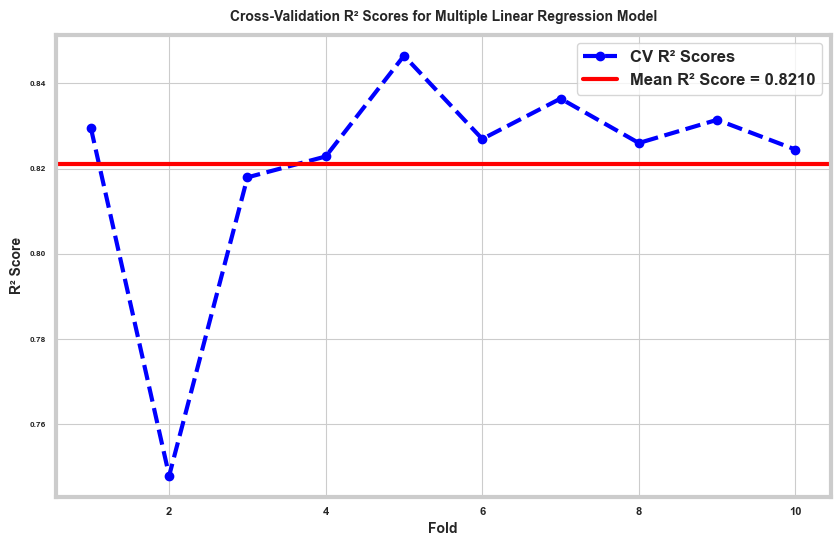

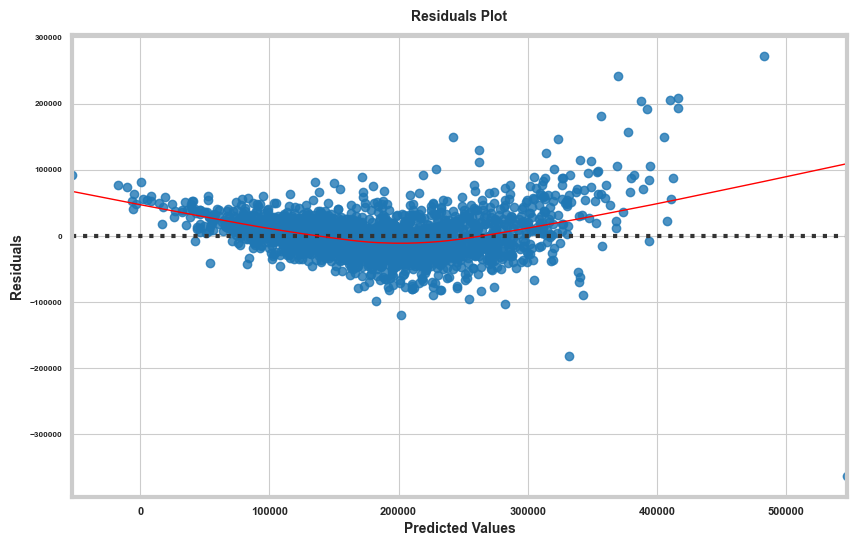

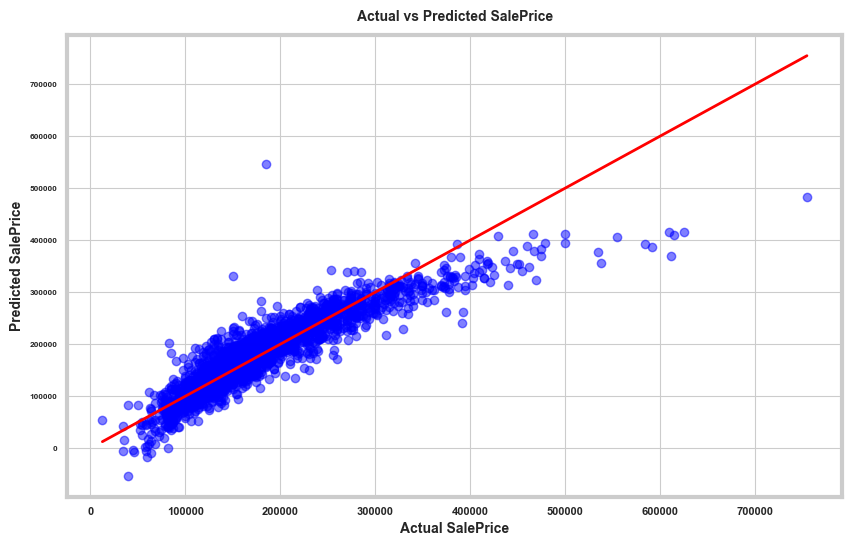

In [52]:
top_10 = [('OverallQual', 0.6180), ('GrLivArea', 0.5128),  ('TotalBsmtSF',0.4058),('GarageCars', 0.3966), ('1stFlrSF', 0.3957), ('GarageArea', 0.3938),
          ('YearBuilt', 0.2848), ('FullBath', 0.2787), ('FullBath', 0.2787), ('YearRemodAdd', 0.2506), ('GarageYrBlt', 0.2442)]

# Extracting the top 10 feature names
top_features = [feature for feature, score in top_10]

# Data preprocessing
# Selecting only numeric columns that are among the top features
X_top = data.select_dtypes(include=['number'])[top_features]

# Scale the data to standardize the features (optional but often useful)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

# Target variable (SalePrice, for example)
y = data['SalePrice']

# Initialize a Linear Regression model
model = LinearRegression()

# Evaluating the model with 5-fold cross-validation using R² score
cv_scores_mlr = cross_val_score(model, X_scaled, y, cv=10, scoring="r2")
mean_mlr_score = cv_scores_mlr.mean()

# Print the mean R² score from cross-validation
print(f"Mean CV R² Score for Multiple Linear Regression Model: {mean_mlr_score:.4f}")

# Plotting Cross-Validation Results
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), cv_scores_mlr, marker='o', color='b', linestyle='--', label='CV R² Scores')
plt.axhline(mean_mlr_score, color='r', linestyle='-', label=f'Mean R² Score = {mean_mlr_score:.4f}')
plt.title('Cross-Validation R² Scores for Multiple Linear Regression Model')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Optional: Train and evaluate on the entire dataset if desired
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# Calculate and plot residuals
residuals = y - y_pred
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Optional: Visualize predicted vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

In [53]:
categorical_features = data.select_dtypes(include=['object']).dropna(axis=1)
categorical_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal
2,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal
3,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal
4,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Detchd,Unf,Fa,Po,P,None,None,None,WD,Normal
2576,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
2577,RH,Pave,None,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,2Types,Unf,TA,TA,Y,None,None,None,WD,Normal
2578,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal


In [54]:
print(f"The shape of the DataFrame before One Hot Encoding is: {categorical_features.shape}")

The shape of the DataFrame before One Hot Encoding is: (2580, 43)


In [55]:
# Import OneHotEncoder and apply it to categorical_features:
from sklearn.preprocessing import OneHotEncoder
 
encoder = OneHotEncoder(sparse_output=False)
categorical_features_One_Hot = encoder.fit_transform(categorical_features)
 
# Convert the encoded result back to a DataFrame
categorical_features_One_Hot_encoded_df = pd.DataFrame(categorical_features_One_Hot, columns=encoder.get_feature_names_out(categorical_features.columns))
 
# Display the new DataFrame and it's expanded shape
print(categorical_features_One_Hot_encoded_df.head())
print(f"The shape of the DataFrame after One Hot Encoding is: {categorical_features_One_Hot_encoded_df.shape}")

   MSZoning_A (agr)  MSZoning_C (all)  MSZoning_FV  MSZoning_I (all)  \
0               0.0               0.0          0.0               0.0   
1               0.0               0.0          0.0               0.0   
2               0.0               1.0          0.0               0.0   
3               0.0               0.0          0.0               0.0   
4               0.0               0.0          0.0               0.0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0          0.0          1.0          0.0          0.0          1.0   
1          0.0          1.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          1.0   
3          0.0          1.0          0.0          0.0          1.0   
4          0.0          1.0          0.0          0.0          1.0   

   Alley_Grvl  ...  SaleType_New  SaleType_Oth  SaleType_VWD  SaleType_WD   \
0         0.0  ...           0.0           0.0           0.0        

In [56]:
# Import OneHotEncoder and apply it to categorical_features:
from sklearn.preprocessing import OneHotEncoder
 
encoder = OneHotEncoder(sparse_output=False,drop="first")
categorical_features_One_Hot = encoder.fit_transform(categorical_features)
 
# Convert the encoded result back to a DataFrame
categorical_features_One_Hot_encoded_df = pd.DataFrame(categorical_features_One_Hot, columns=encoder.get_feature_names_out(categorical_features.columns))
 
# Display the new DataFrame and it's expanded shape
print(categorical_features_One_Hot_encoded_df.head())
print(f"The shape of the DataFrame after One Hot Encoding is: {categorical_features_One_Hot_encoded_df.shape}")

   MSZoning_C (all)  MSZoning_FV  MSZoning_I (all)  MSZoning_RH  MSZoning_RL  \
0               0.0          0.0               0.0          0.0          1.0   
1               0.0          0.0               0.0          0.0          1.0   
2               1.0          0.0               0.0          0.0          0.0   
3               0.0          0.0               0.0          0.0          1.0   
4               0.0          0.0               0.0          0.0          1.0   

   MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  ...  \
0          0.0          1.0         1.0         0.0           0.0  ...   
1          0.0          1.0         1.0         0.0           0.0  ...   
2          0.0          1.0         1.0         0.0           0.0  ...   
3          0.0          1.0         1.0         0.0           0.0  ...   
4          0.0          1.0         1.0         0.0           0.0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_VWD  SaleType_WD  

In [57]:
'''The Ames dataset’s categorical columns are converted into 231 distinct features, illustrating the expanded complexity and 
detailed representation that One Hot Encoding provides. This expansion, while increasing the dimensionality of the dataset, 
is a crucial preprocessing step when modeling the relationship between categorical features and the target variable in linear regression'''

'The Ames dataset’s categorical columns are converted into 231 distinct features, illustrating the expanded complexity and \ndetailed representation that One Hot Encoding provides. This expansion, while increasing the dimensionality of the dataset, \nis a crucial preprocessing step when modeling the relationship between categorical features and the target variable in linear regression'

In [58]:
#Identifying the most Predictive Categorical Feature which contributes most significantly to predicting the sale price
# Set 'SalePrice' as the target variable
y = data["SalePrice"]
 
# Dictionary to store feature names and their corresponding mean CV R² scores
feature_scores = {}
 
for feature in categorical_features.columns:
    encoder = OneHotEncoder(drop="first")
    X_encoded = encoder.fit_transform(categorical_features[[feature]])
 
    # Initialize the linear regression model
    model = LinearRegression()
 
    # Perform 5-fold cross-validation and calculate R^2 scores
    scores = cross_val_score(model, X_encoded, y)
    mean_score = scores.mean()
 
    # Store the mean R^2 score
    feature_scores[feature] = mean_score
 
# Sort features based on their mean CV R² scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
print("Feature selected for highest predictability:", sorted_features[0][0])

Feature selected for highest predictability: Neighborhood


In [59]:
'''“Neighborhood” is the categorical feature with the highest predictability in our dataset. 
This finding highlights the significant impact of location on housing prices within the Ames dataset'''

'“Neighborhood” is the categorical feature with the highest predictability in our dataset. \nThis finding highlights the significant impact of location on housing prices within the Ames dataset'

Top 10 Categorical Features:
Neighborhood: Mean CV R² = 0.5406
BsmtQual: Mean CV R² = 0.4650
ExterQual: Mean CV R² = 0.4649
KitchenQual: Mean CV R² = 0.4369
FireplaceQu: Mean CV R² = 0.2804
GarageFinish: Mean CV R² = 0.2772
Foundation: Mean CV R² = 0.2545
GarageType: Mean CV R² = 0.2263
BsmtFinType1: Mean CV R² = 0.2100
HeatingQC: Mean CV R² = 0.1889


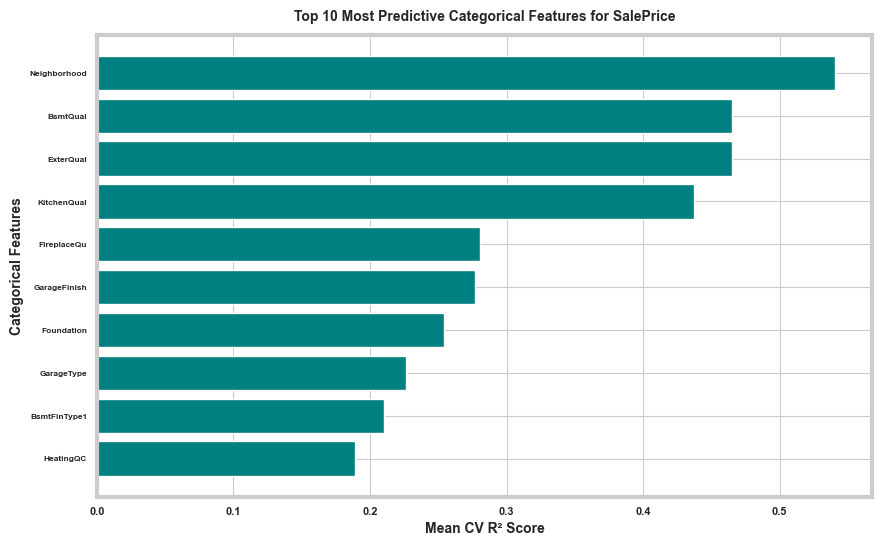

In [60]:
'''the top ten categorical features that significantly impact housing prices. This step is essential for fine-tuning our predictive model, 
enabling us to focus on the most valuable features in forecasting outcomes. By evaluating each feature’s mean cross-validated R² score, 
we can determine not just the importance of these features individually but also gain insights into how different aspects of a property contribute to
its overall valuation'''

categorical_features = data.select_dtypes(include=['object', 'category'])

# Set 'SalePrice' as the target variable
y = data["SalePrice"]

# Dictionary to store feature names and their corresponding mean CV R² scores
feature_scores = {}

# Iterate over each categorical feature
for feature in categorical_features.columns:
    encoder = OneHotEncoder(drop="first", sparse_output=False)  # Ensure dense output
    X_encoded = encoder.fit_transform(categorical_features[[feature]])  # One-hot encode the feature
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Perform 5-fold cross-validation and calculate R² scores
    scores = cross_val_score(model, X_encoded, y, cv=5, scoring='r2')  # Explicitly specify R² scoring
    mean_score = scores.mean()  # Mean R² score
    
    # Store the mean R² score in the dictionary
    feature_scores[feature] = mean_score

# Sort features based on their mean CV R² scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)

# Print the top 10 most predictive categorical features
print("Top 10 Categorical Features:")
for feature, score in sorted_features[:10]:
    print(f"{feature}: Mean CV R² = {score:.4f}")

# Prepare data for plotting
features = [item[0] for item in sorted_features[:10]]  # Top 10 features
scores = [item[1] for item in sorted_features[:10]]    # Corresponding R² scores

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='teal')
plt.xlabel('Mean CV R² Score')
plt.ylabel('Categorical Features')
plt.title('Top 10 Most Predictive Categorical Features for SalePrice')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest score at the top
plt.show()


In [61]:
#The Crucial Role of Feature Scaling in Penalized Regression Models
'''Data preprocessing is a pivotal step that significantly impacts model performance. One essential preprocessing step,
particularly crucial when dealing with penalized regression models such as Lasso, Ridge, and ElasticNet, is feature scaling. 
Feature scaling is a method used to standardize the range of independent variables or features within data'''
#Feature Identification: It selects numeric and categorical features from the dataset, excluding the PID and SalePrice columns.
# Identify numeric and categorical features, excluding 'PID' and 'SalePrice'
#apply scaling to numeric features and one-hot encoding to categorical features using a ColumnTransformer.
#set up pipelines for Lasso, Ridge, and ElasticNet models, combining the preprocessing steps with the respective models
#perform cross-validation for each model and computes the mean cross-validation scores, storing these results in a dictionary
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice']).columns
categorical_features = data.select_dtypes(include=['object']).columns
X = data[numeric_features.tolist() + categorical_features.tolist()]
 
# Target variable
y = data['SalePrice']
 
# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
 
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
 
# Combined preprocessor for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Define the model pipelines with preprocessor and regressor
pipelines = {
    'Lasso': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(max_iter=20000))]),
    'Ridge': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())]),
    'ElasticNet': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ElasticNet())])
}
 
# Perform cross-validation and store results in a dictionary
cv_results = {}
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y)
    cv_results[name] = round(scores.mean(), 4)
 
# Output the mean cross-validation scores
print(cv_results)


{'Lasso': 0.9095, 'Ridge': 0.9131, 'ElasticNet': 0.8741}


Mean Cross-Validation Scores:
{'Lasso': 0.9095, 'Ridge': 0.9131, 'ElasticNet': 0.8741}


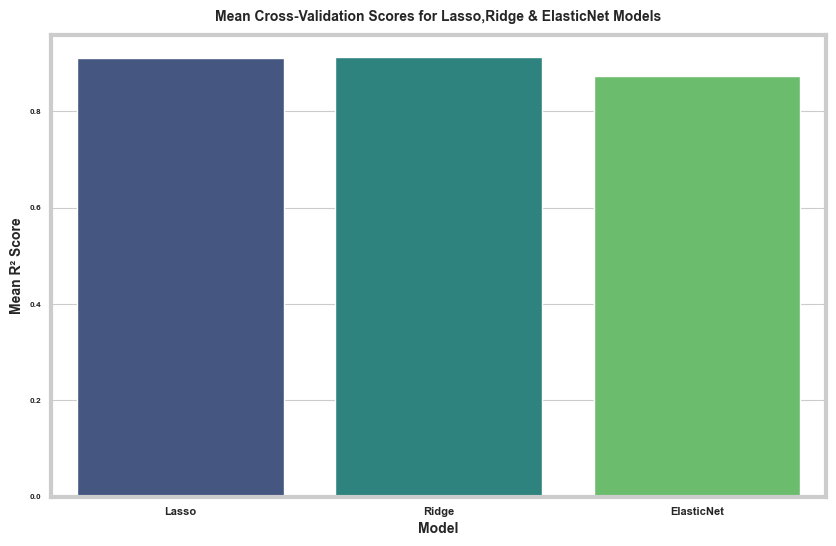

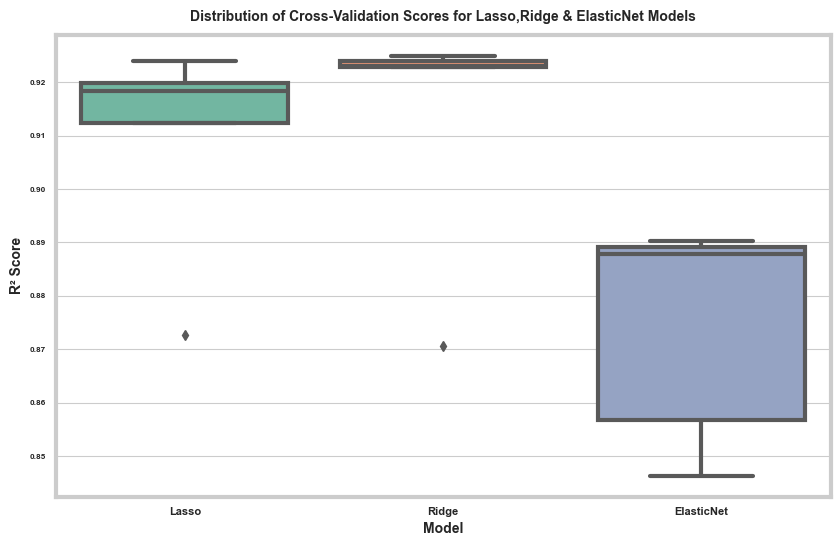

In [62]:
# Step 1: Identify numeric and categorical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Create the combined X dataset for model training
X = data[numeric_features.tolist() + categorical_features.tolist()]

# Target variable
y = data['SalePrice']

# Step 2: Define the pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Step 3: Combined preprocessor for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Define the model pipelines
pipelines = {
    'Lasso': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(max_iter=20000))]),
    'Ridge': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())]),
    'ElasticNet': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ElasticNet())])
}

# Step 5: Perform cross-validation and store results
cv_results = {}
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5)  # Perform 5-fold cross-validation
    cv_results[name] = scores  # Store the raw scores for later use

# Step 6: Calculate the mean scores for plotting
mean_scores = {name: round(np.mean(scores), 4) for name, scores in cv_results.items()}

# Print the mean cross-validation scores
print("Mean Cross-Validation Scores:")
print(mean_scores)

# Step 7: Plotting the results

# 1. Bar Plot for mean cross-validation scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(mean_scores.keys()), y=list(mean_scores.values()), palette="viridis")
plt.title('Mean Cross-Validation Scores for Lasso,Ridge & ElasticNet Models')
plt.xlabel('Model')
plt.ylabel('Mean R² Score')
plt.show()

# 2. Box Plot for distribution of cross-validation scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(cv_results.values()), palette="Set2")
plt.xticks(ticks=np.arange(len(cv_results)), labels=cv_results.keys())
plt.title('Distribution of Cross-Validation Scores for Lasso,Ridge & ElasticNet Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.show()


In [63]:
'''Bar plot showing the mean R² scores for each model. This provides a clear comparison of the models performance.
Box plotdisplays the distribution of the cross-validation scores for each model. 
This plot gives insight into the variability of performance for each model'''

'Bar plot showing the mean R² scores for each model. This provides a clear comparison of the models performance.\nBox plotdisplays the distribution of the cross-validation scores for each model. \nThis plot gives insight into the variability of performance for each model'

In [64]:
# Step 1: Separate the numeric and categorical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice'])
categorical_features = data.select_dtypes(include=['object'])

# Step 2: One-Hot Encode the categorical features
categorical_features_encoded = categorical_features_One_Hot_encoded_df

# Step 3: Merge the One-Hot Encoded categorical features with numeric features
X = pd.concat([categorical_features_encoded, numeric_features], axis=1)

# Now `X` is your final feature set with both numeric and encoded categorical features
print(X.head())


   MSZoning_C (all)  MSZoning_FV  MSZoning_I (all)  MSZoning_RH  MSZoning_RL  \
0               0.0          0.0               0.0          0.0          1.0   
1               0.0          0.0               0.0          0.0          1.0   
2               1.0          0.0               0.0          0.0          0.0   
3               0.0          0.0               0.0          0.0          1.0   
4               0.0          0.0               0.0          0.0          1.0   

   MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  ...  \
0          0.0          1.0         1.0         0.0           0.0  ...   
1          0.0          1.0         1.0         0.0           0.0  ...   
2          0.0          1.0         1.0         0.0           0.0  ...   
3          0.0          1.0         1.0         0.0           0.0  ...   
4          0.0          1.0         1.0         0.0           0.0  ...   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPor

In [65]:
# Tree_based Models building
# Define features (X) and target (y)
X = pd.concat([categorical_features_encoded, numeric_features], axis=1)
X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
y = data['SalePrice']
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Build and Train Tree-Based Models
# 1. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [66]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# 3. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [68]:
# 4. XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
# 5. LightGBM Regressor
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3943
[LightGBM] [Info] Number of data points in the train set: 2064, number of used features: 184
[LightGBM] [Info] Start training from score 176842.879845


LGBMRegressor(random_state=42)

In [70]:
# Evaluate the Models
#We'll evaluate the models using common regression metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50)

# Evaluate each model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50)

# Evaluate each model
evaluate_model(dt_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)
evaluate_model(gb_model, X_test, y_test)
evaluate_model(xgb_model, X_test, y_test)
evaluate_model(lgbm_model, X_test, y_test)# Function to evaluate model performance


Model: DecisionTreeRegressor
Mean Squared Error: 1551565789.9593
Mean Absolute Error: 25004.1609
R² Score: 0.7478
--------------------------------------------------
Model: RandomForestRegressor
Mean Squared Error: 668647356.5179
Mean Absolute Error: 15977.8256
R² Score: 0.8913
--------------------------------------------------
Model: GradientBoostingRegressor
Mean Squared Error: 606717086.9743
Mean Absolute Error: 15015.4825
R² Score: 0.9014
--------------------------------------------------
Model: XGBRegressor
Mean Squared Error: 606801017.8774
Mean Absolute Error: 15360.4573
R² Score: 0.9014
--------------------------------------------------
Model: LGBMRegressor
Mean Squared Error: 564391454.3748
Mean Absolute Error: 14352.3547
R² Score: 0.9083
--------------------------------------------------


Model: DecisionTreeRegressor
Mean Squared Error: 1551565789.9593
Mean Absolute Error: 25004.1609
R² Score: 0.7478
--------------------------------------------------
Model: RandomForestRegressor
Mean Squared Error: 668647356.5179
Mean Absolute Error: 15977.8256
R² Score: 0.8913
--------------------------------------------------
Model: GradientBoostingRegressor
Mean Squared Error: 606717086.9743
Mean Absolute Error: 15015.4825
R² Score: 0.9014
--------------------------------------------------
Model: XGBRegressor
Mean Squared Error: 606801017.8774
Mean Absolute Error: 15360.4573
R² Score: 0.9014
--------------------------------------------------
Model: LGBMRegressor
Mean Squared Error: 564391454.3748
Mean Absolute Error: 14352.3547
R² Score: 0.9083
--------------------------------------------------


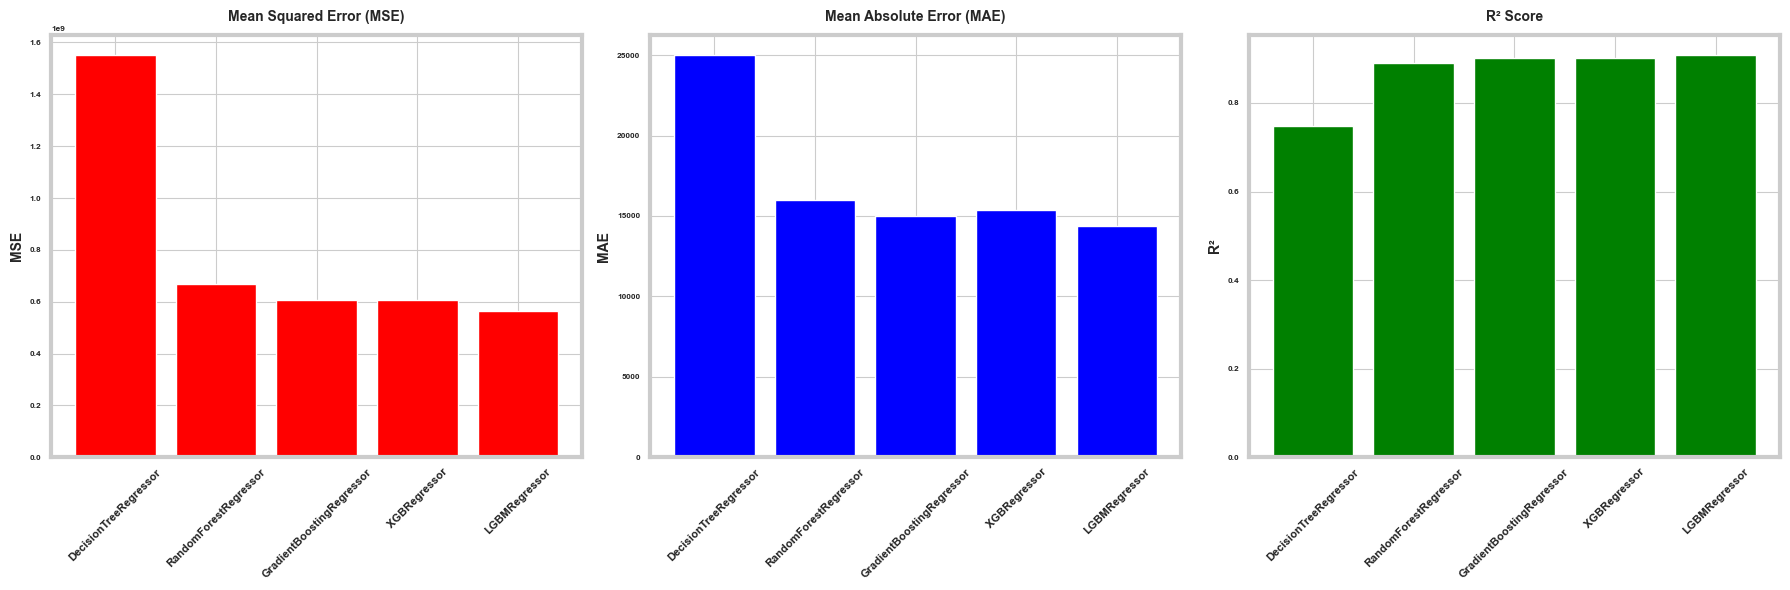

In [71]:
# Initialize lists to store model evaluation metrics
models = []
mse_values = []
mae_values = []
r2_values = []

# Modified evaluate_model to return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50)

    # Store metrics for plotting
    models.append(model.__class__.__name__)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Evaluate each model and collect metrics
evaluate_model(dt_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)
evaluate_model(gb_model, X_test, y_test)
evaluate_model(xgb_model, X_test, y_test)
evaluate_model(lgbm_model, X_test, y_test)

# Plot the metrics for all models
def plot_metrics():
    x = range(len(models))  # Model indices for x-axis

    # Create subplots for MSE, MAE, and R²
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # MSE Plot
    ax[0].bar(x, mse_values, color='red')
    ax[0].set_title("Mean Squared Error (MSE)")
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(models, rotation=45)
    ax[0].set_ylabel("MSE")

    # MAE Plot
    ax[1].bar(x, mae_values, color='blue')
    ax[1].set_title("Mean Absolute Error (MAE)")
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(models, rotation=45)
    ax[1].set_ylabel("MAE")

    # R² Plot
    ax[2].bar(x, r2_values, color='green')
    ax[2].set_title("R² Score")
    ax[2].set_xticks(x)
    ax[2].set_xticklabels(models, rotation=45)
    ax[2].set_ylabel("R²")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_metrics()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3943
[LightGBM] [Info] Number of data points in the train set: 2064, number of used features: 184
[LightGBM] [Info] Start training from score 176842.879845
0:	learn: 71947.5993561	total: 91.7ms	remaining: 2m 17s
100:	learn: 18783.7596281	total: 7.6s	remaining: 1m 45s
200:	learn: 14559.4481800	total: 14.8s	remaining: 1m 35s
300:	learn: 11532.6831874	total: 21.6s	remaining: 1m 26s
400:	learn: 10046.6706572	total: 28.1s	remaining: 1m 16s
500:	learn: 8401.7451772	total: 34.8s	remaining: 1m 9s
600:	learn: 7140.2174316	total: 41.4s	remaining: 1m 1s
700:	learn: 6153.0207180	total: 47.7s	remaining: 54.4s
800:	learn: 5336.7749971	total: 53.7s	remaining: 46.9s
900:	learn: 4564.9559506	total: 59.3s	remaining: 39.4s
1000:	learn: 3955.2228925	total: 1m 6s	remaining: 33s
1100:	learn: 3418.2413325	total: 1m 12s	r

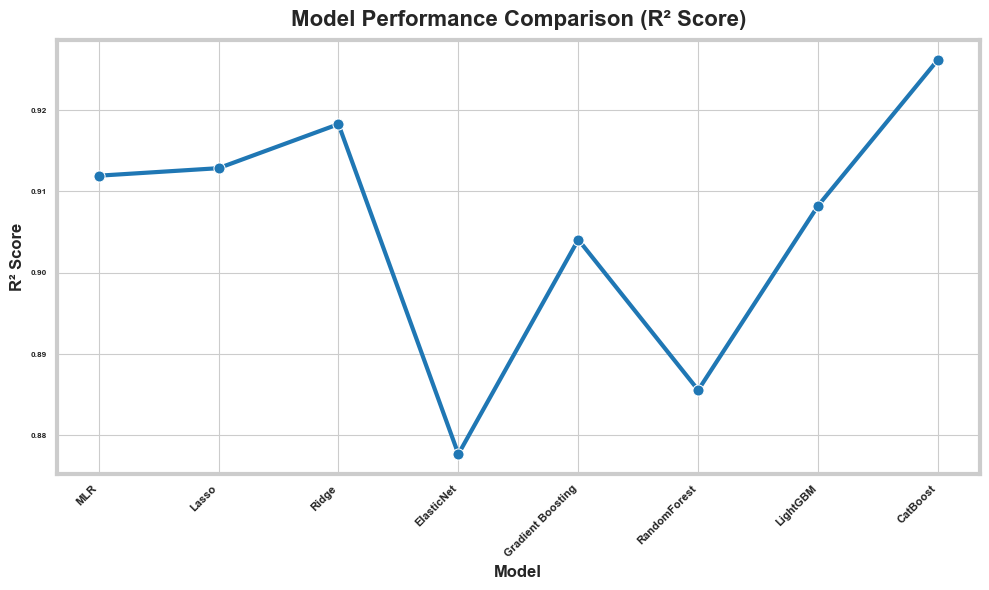

In [86]:
# Assuming data is already loaded and preprocessed as per your provided code:
X = pd.concat([categorical_features_encoded, numeric_features], axis=1)
X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
y = data['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'MLR': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(
    learning_rate=0.05,
    iterations=1500,
    depth=10,
    l2_leaf_reg=8,
    bagging_temperature=1.0,
    random_strength=1.0,
    loss_function='RMSE',
    verbose=100
)
}

# Prepare lists to store results
model_names = []
r2_scores = []

# Fit and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    r2_scores.append(r2)

# Create a dataframe for visualization
results_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores
})

# Plot using seaborn lineplot (stacked plot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Model', y='R2 Score', marker='o', markersize=8)

# Title and labels
plt.title('Model Performance Comparison (R² Score)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

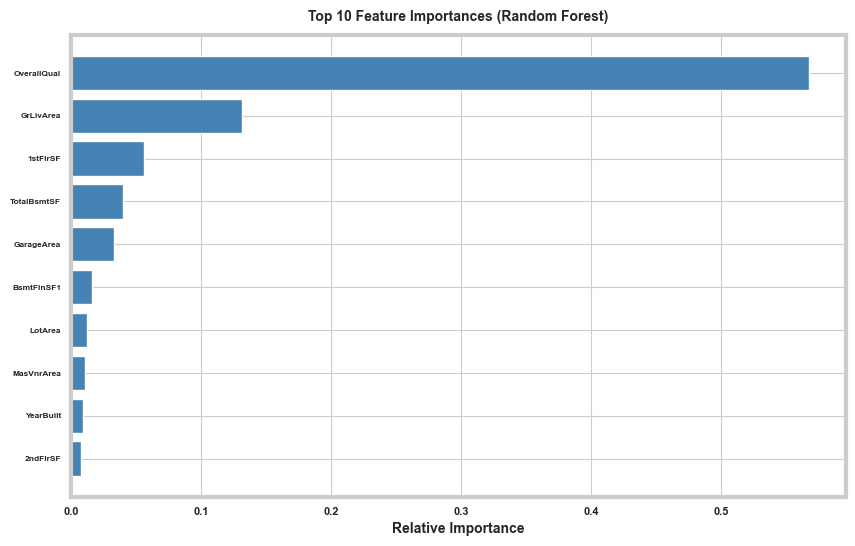

In [73]:
 #Feature Importance which helps in understanding which features are most important in predicting house sale prices.
# Feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Get the indices that would sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_n = 10
top_indices = indices[:top_n]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.barh(range(top_n), importances[top_indices], align="center", color='steelblue')
plt.yticks(range(top_n), [X.columns[i] for i in top_indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # Reverse the order to have the most important feature on top
plt.show()

Mean Squared Error (MSE): 362819435.3782
Mean Absolute Error (MAE): 12537.1876
R² Score: 0.9410


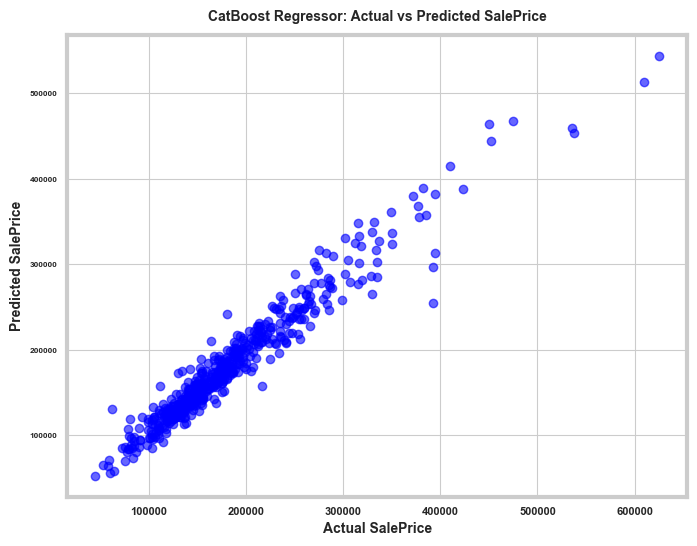

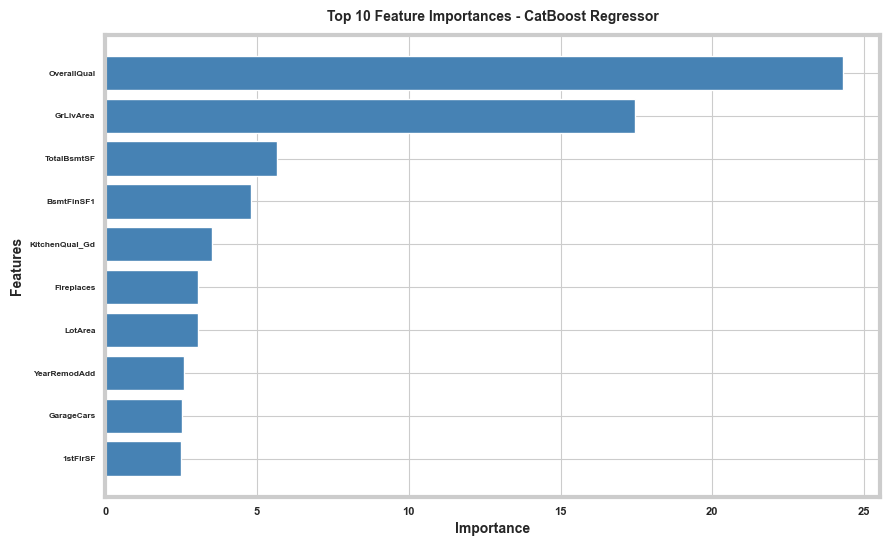

In [74]:
X = pd.concat([categorical_features_encoded, numeric_features], axis=1)

# Clean column names by replacing non-alphanumeric characters with underscores
X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
# Define target variable (SalePrice)
y = data['SalePrice']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Regressor model
catboost_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42, silent=True)

# Train the model on the training data
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Visualize the predicted vs actual values (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title('CatBoost Regressor: Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()
# Extract feature importances from the trained CatBoost model
feature_importance = catboost_model.get_feature_importance()

# Get the indices that would sort the importances in descending order
indices = np.argsort(feature_importance)[::-1]
top_n = 10
top_indices = indices[:top_n]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance[top_indices], align='center', color='steelblue')

# Set the y-ticks to the feature names of the top 10 features
plt.yticks(range(top_n), [X.columns[i] for i in top_indices])

# Title and labels
plt.title(f'Top {top_n} Feature Importances - CatBoost Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')

# Reverse the y-axis so the most important feature is at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

Average R² score for default CatBoost: 0.9294
Average R² score for CatBoost with Ordered Boosting: 0.9213


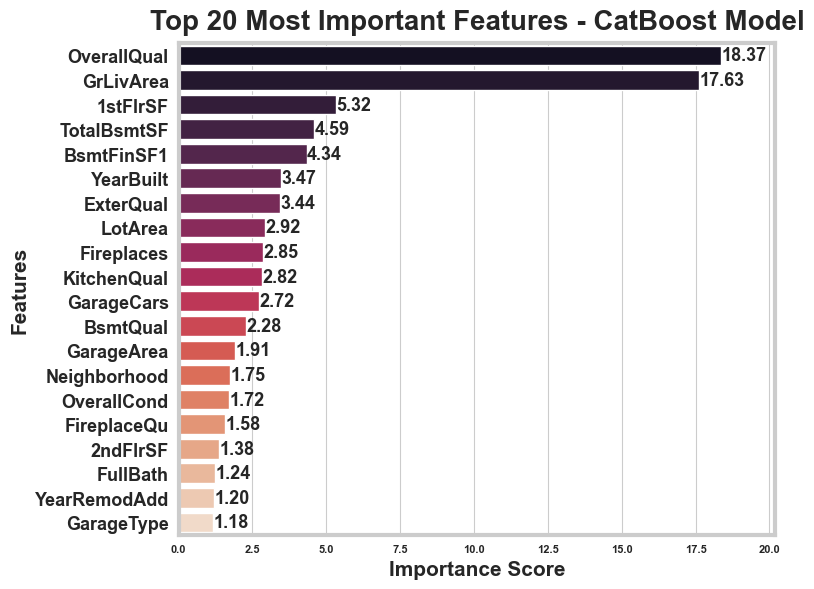

In [75]:
data= pd.read_csv("Ames_HousePrice.csv")
X=data.drop(['SalePrice'],axis=1)
y = data['SalePrice']
# Identify and fill NaNs in categorical columns
cat_features = [col for col in X.columns if X[col].dtype == 'object']
X[cat_features] = X[cat_features].fillna('Missing')
 
# Identify categorical columns
cat_features = X.select_dtypes(include=['object']).columns.tolist()
# Define and train the default CatBoost model
default_model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
default_scores = cross_val_score(default_model, X, y, cv=5, scoring='r2')
print(f"Average R² score for default CatBoost: {default_scores.mean():.4f}")
 
# Define and train the CatBoost model with Ordered Boosting
ordered_model = CatBoostRegressor(cat_features=cat_features, random_state=42, 
                                  boosting_type='Ordered', verbose=0)
ordered_scores = cross_val_score(ordered_model, X, y, cv=5, scoring='r2')
print(f"Average R² score for CatBoost with Ordered Boosting: {ordered_scores.mean():.4f}")

# Set up K-fold cross-validation
kf = KFold(n_splits=5)
feature_importances = []
 
# Iterate over each split
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
    # Train default CatBoost model
    model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
    model.fit(X_train, y_train)
    feature_importances.append(model.get_feature_importance())
 
# Average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)
 
# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
 
# Sort and take the top 20 features
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)
 
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("rocket", len(top_features))
 
# Create the plot
plt.figure(figsize=(, 10))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)
 
# Customize the plot
plt.title('Top 20 Most Important Features - CatBoost Model', fontsize=20, fontweight='bold')
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
 
# Add value labels to the end of each bar
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=13)
 
# Extend x-axis by 10% and feature names font size
plt.xlim(0, max(top_features['Importance']) * 1.1)
plt.yticks(fontsize=13)
 
# Adjust layout and display
plt.tight_layout()
plt.show()

In [76]:
'''Top Predictors: The two most important features by a significant margin are  ‘OverallQual’ (Overall Quality) and ‘GrLivArea’ (Ground Living Area).
This suggests that the size of the living area and the overall quality of the home are the strongest predictors of price in our model.
Neighborhood Matters: ‘Neighborhood’ ranks as the third most important feature, highlighting the significant impact of location on home prices.
Size and Quality Dominate: Many of the top features relate to the size (e.g., ‘TotalBsmtSF’, ‘1stFlrSF’) or quality (e.g., ‘ExterQual’, ‘KitchenQual’) 
of different aspects of the home.
Basement Features: Several basement-related features (‘BsmtFinSF1’, ‘TotalBsmtSF’, ‘BsmtQual’) appear in the top 10, 
indicating the importance of basement characteristics in determining home value.
External Factors: Features like ‘ExterQual’ (Exterior Quality) and ‘LotArea’ also play significant roles, showing that both the quality of 
the house’s exterior and the size of the lot contribute to the price.
Age Matters, But Not As Much: ‘YearBuilt’ appears in the top 20, but its relatively lower importance suggests that other factors often outweigh 
the age of the home in determining its price.
By leveraging these insights, real estate market stakeholders can make more informed decisions about property valuation, home improvements,
    and investment strategies'''

'Top Predictors: The two most important features by a significant margin are  ‘OverallQual’ (Overall Quality) and ‘GrLivArea’ (Ground Living Area).\nThis suggests that the size of the living area and the overall quality of the home are the strongest predictors of price in our model.\nNeighborhood Matters: ‘Neighborhood’ ranks as the third most important feature, highlighting the significant impact of location on home prices.\nSize and Quality Dominate: Many of the top features relate to the size (e.g., ‘TotalBsmtSF’, ‘1stFlrSF’) or quality (e.g., ‘ExterQual’, ‘KitchenQual’) \nof different aspects of the home.\nBasement Features: Several basement-related features (‘BsmtFinSF1’, ‘TotalBsmtSF’, ‘BsmtQual’) appear in the top 10, \nindicating the importance of basement characteristics in determining home value.\nExternal Factors: Features like ‘ExterQual’ (Exterior Quality) and ‘LotArea’ also play significant roles, showing that both the quality of \nthe house’s exterior and the size of the

Average R² score for default CatBoost: 0.9293
Average R² score for CatBoost with Ordered Boosting: 0.9220


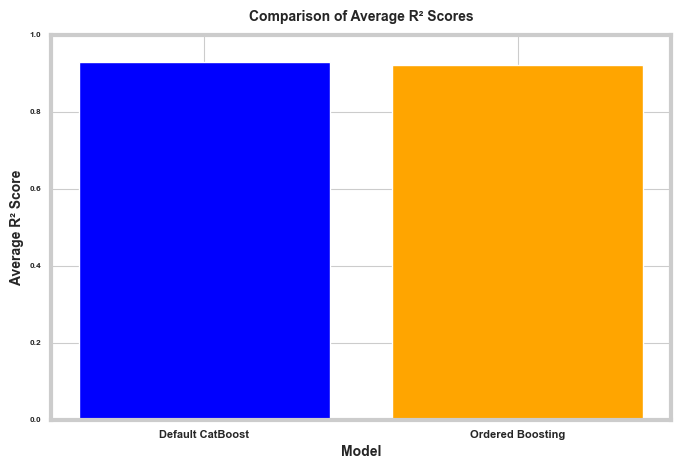

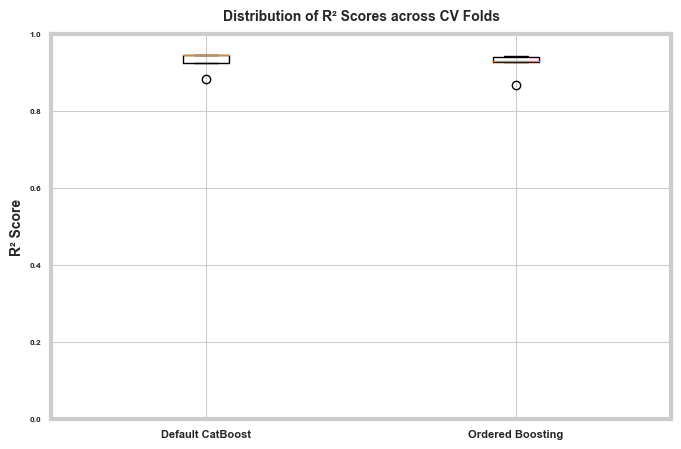

In [77]:
# Load dataset
data = pd.read_csv("Ames_HousePrice.csv")
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Identify and fill NaNs in categorical columns
cat_features = [col for col in X.columns if X[col].dtype == 'object']
X['Electrical'] = X['Electrical'].fillna(X['Electrical'].mode()[0])
X[cat_features] = X[cat_features].fillna('Missing')

# Identify categorical columns
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Define and train the default CatBoost model
default_model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
default_scores = cross_val_score(default_model, X, y, cv=5, scoring='r2')

# Define and train the CatBoost model with Ordered Boosting
ordered_model = CatBoostRegressor(cat_features=cat_features, random_state=42, 
                                  boosting_type='Ordered', verbose=0)
ordered_scores = cross_val_score(ordered_model, X, y, cv=5, scoring='r2')

# Print average R² scores
print(f"Average R² score for default CatBoost: {default_scores.mean():.4f}")
print(f"Average R² score for CatBoost with Ordered Boosting: {ordered_scores.mean():.4f}")

# Plot 1: Bar plot comparing average R² scores
plt.figure(figsize=(8, 5))
scores = ['Default CatBoost', 'Ordered Boosting']
avg_scores = [default_scores.mean(), ordered_scores.mean()]
plt.bar(scores, avg_scores, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Average R² Score')
plt.title('Comparison of Average R² Scores')
plt.ylim([0, 1])
plt.show()

# Plot 2: Box plot of R² scores for cross-validation folds
plt.figure(figsize=(8, 5))
plt.boxplot([default_scores, ordered_scores], labels=scores)
plt.ylabel('R² Score')
plt.title('Distribution of R² Scores across CV Folds')
plt.ylim([0, 1])
plt.show()

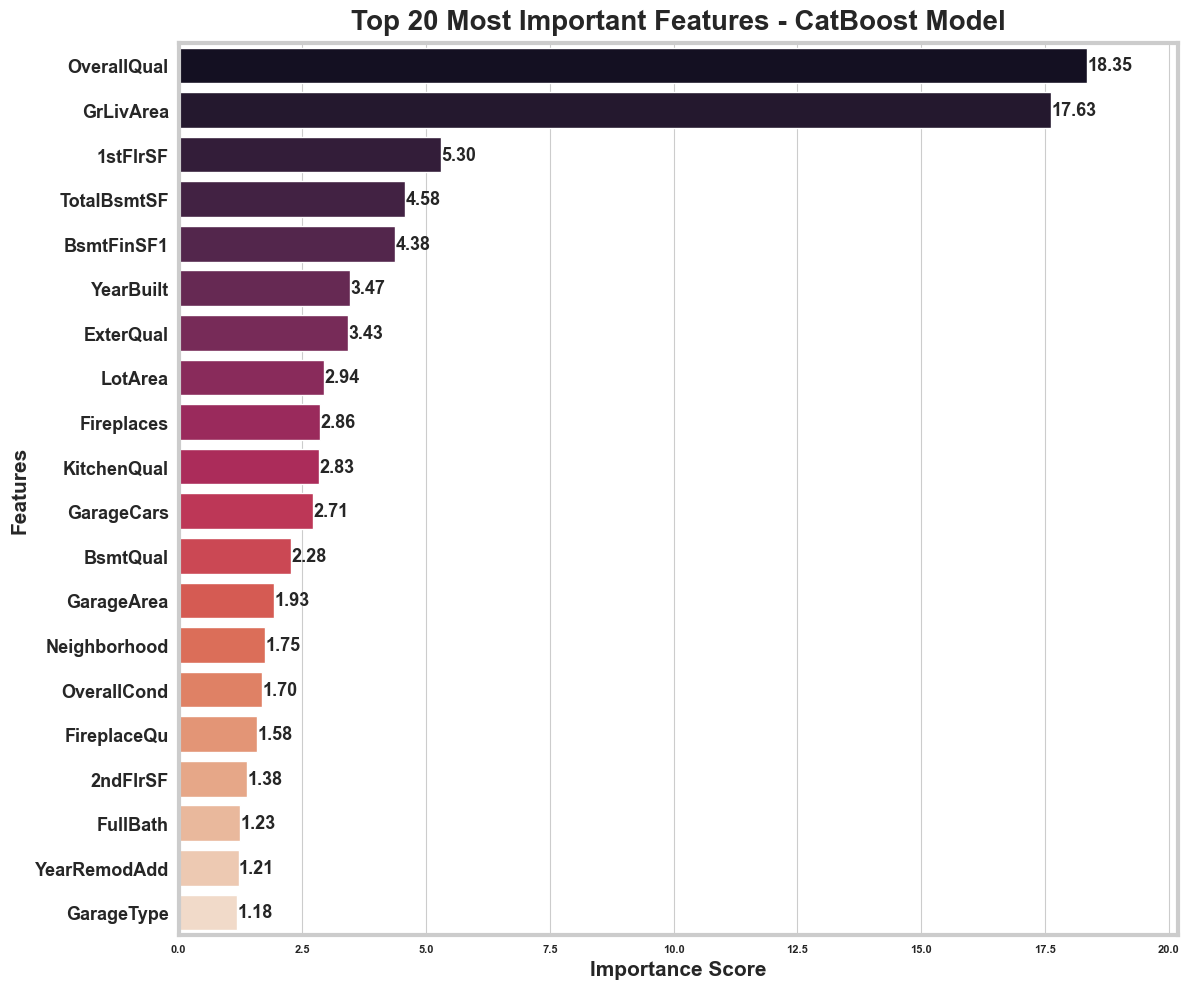

In [78]:
# Set up K-fold cross-validation
kf = KFold(n_splits=5)
feature_importances = []
 
# Iterate over each split
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
    # Train default CatBoost model
    model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
    model.fit(X_train, y_train)
    feature_importances.append(model.get_feature_importance())
 
# Average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)
 
# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
 
# Sort and take the top 20 features
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)
 
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("rocket", len(top_features))
 
# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)
 
# Customize the plot
plt.title('Top 20 Most Important Features - CatBoost Model', fontsize=20, fontweight='bold')
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
 
# Add value labels to the end of each bar
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=13)
 
# Extend x-axis by 10% and feature names font size
plt.xlim(0, max(top_features['Importance']) * 1.1)
plt.yticks(fontsize=13)
 
# Adjust layout and display
plt.tight_layout()
plt.show()